# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

## External validation of lab-based ML/DL models WITH model updating by Brunei data
---


## Importing Libraries

In [111]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
import seaborn as sns

# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score,roc_auc_score,roc_curve
from sklearn.metrics import PrecisionRecallDisplay

# TensorFlow and tf.keras
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Ensembling
from mlxtend.classifier import StackingCVClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the local Brunei dataset

In [2]:
# Reading local Brunei dataset
Bru_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Brunei_validation_dataset.csv")

# Informtion about the raw dataset
Bru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   Age              1000 non-null   float64
 2   Gender           1000 non-null   int64  
 3   SysBP            1000 non-null   float64
 4   Diabetes         1000 non-null   int64  
 5   Smoking          1000 non-null   int64  
 6   Tot_Chol_mmol/l  1000 non-null   float64
 7   CVD risk         1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [3]:
# define variable columns based on office-based CVD screening strategy
Bru_df = Bru_df.loc[:,['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l','CVD risk']]
Bru_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,56.0,1,110.1,0,0,6.1,0
1,67.7,1,183.7,0,0,7.5,0
2,62.6,2,129.0,0,0,4.3,0
3,61.8,2,160.1,0,0,7.1,0
4,46.8,1,104.2,0,1,4.6,0


## Reading the lab_based dataset

In [4]:
# Reading office_based dataset
lab_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/lab_based_dataset.csv")

# Informtion about the raw dataset
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28442 entries, 0 to 28441
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       28442 non-null  int64  
 1   Age              28442 non-null  float64
 2   Gender           28442 non-null  int64  
 3   SysBP            28442 non-null  float64
 4   Diabetes         28442 non-null  int64  
 5   Smoking          28442 non-null  int64  
 6   Tot_Chol_mmol/l  28442 non-null  float64
 7   CVD risk         28442 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.7 MB


In [5]:
# define variable columns based on lab-based CVD screening strategy
lab_df = lab_df.loc[:,['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l','CVD risk']]
lab_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39.0,2,106.0,0,0,5.0,0
1,46.0,1,121.0,0,0,6.5,0
2,48.0,2,127.5,0,1,6.3,0
3,61.0,1,150.0,0,1,5.8,1
4,46.0,1,130.0,0,1,7.4,0


# Predictive ML Modeling

Introduction
---
- We will predict the risk of cardiovascular disease in the screeing population based on our lab-based dataset using several Machine Learning (ML) algorithms. Pipeline and ensembeling techniques of these various ML algorithms will be used, and their outputs are being compared to one another.

We use the following different machine learning models for the dataset:
---

1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Gradient Boosting Classifier
6. Support Vector Machine
7. Gaussian Naive Bayes
8. Finally, **Staking ML ensembling**

9. **Artificial Neural Network**


## Model preparation

---

### Preparing Training and test datasets for external validation and updating of lab-based dataset

In [6]:
lab_Bru_df = pd.concat([lab_df, Bru_df])
lab_Bru_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29442 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              29442 non-null  float64
 1   Gender           29442 non-null  int64  
 2   SysBP            29442 non-null  float64
 3   Diabetes         29442 non-null  int64  
 4   Smoking          29442 non-null  int64  
 5   Tot_Chol_mmol/l  29442 non-null  float64
 6   CVD risk         29442 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.8 MB


In [7]:
lab_Bru_df.sample(20)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
3673,34.0,2,117.5,0,1,4.0,0
10710,22.0,1,106.0,0,0,6.8,0
3804,65.0,1,158.0,0,0,5.8,1
14388,29.0,2,131.3,0,0,4.4,0
18658,77.0,2,145.3,0,0,6.4,0
14115,49.0,1,104.7,0,0,5.5,0
10142,20.0,2,113.0,0,0,4.9,0
1405,42.0,1,113.0,0,0,4.4,1
15997,30.0,2,146.0,0,0,7.0,0
6510,22.0,1,100.7,0,0,4.9,0


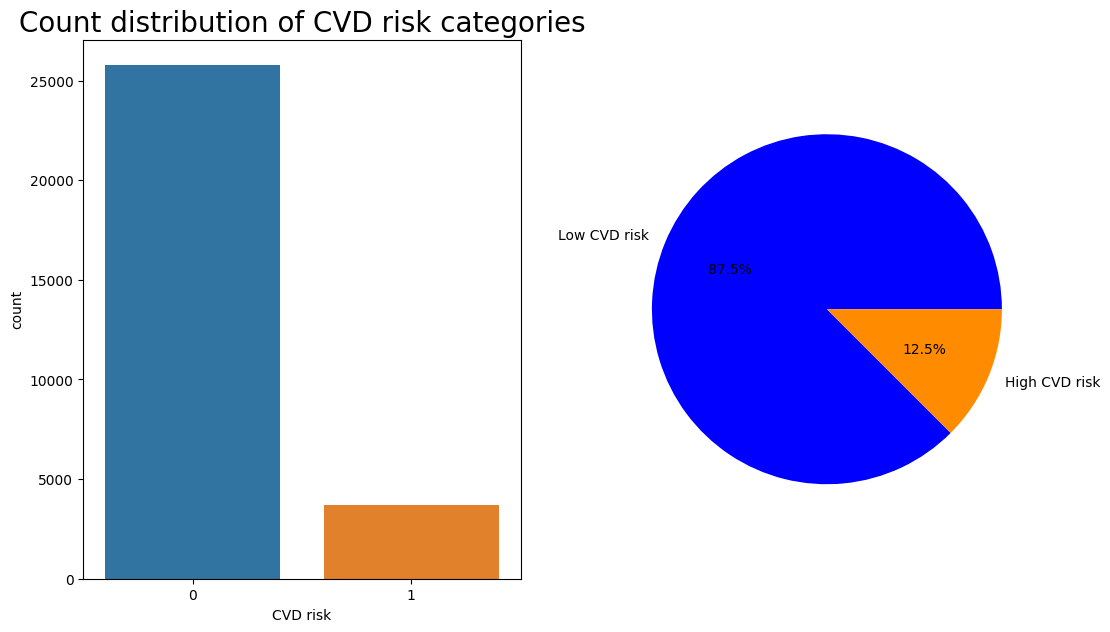

In [8]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(7, 7), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="CVD risk", data=lab_Bru_df)
plt.title("Count distribution of CVD risk categories", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(lab_Bru_df["CVD risk"].value_counts(),autopct="%1.1f%%",labels=['Low CVD risk', 'High CVD risk'],colors=["blue", "darkorange"])
plt.show()

## Resampling label imbalanced class by oversampling positive cases

In [9]:
target1=lab_Bru_df[lab_Bru_df['CVD risk']==1]
target0=lab_Bru_df[lab_Bru_df['CVD risk']==0]

target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [10]:
target=pd.concat([target0,target1])
target['CVD risk'].value_counts()

0    25763
1    25763
Name: CVD risk, dtype: int64

In [11]:
lab_Bru_df=target
np.shape(lab_Bru_df)

(51526, 7)

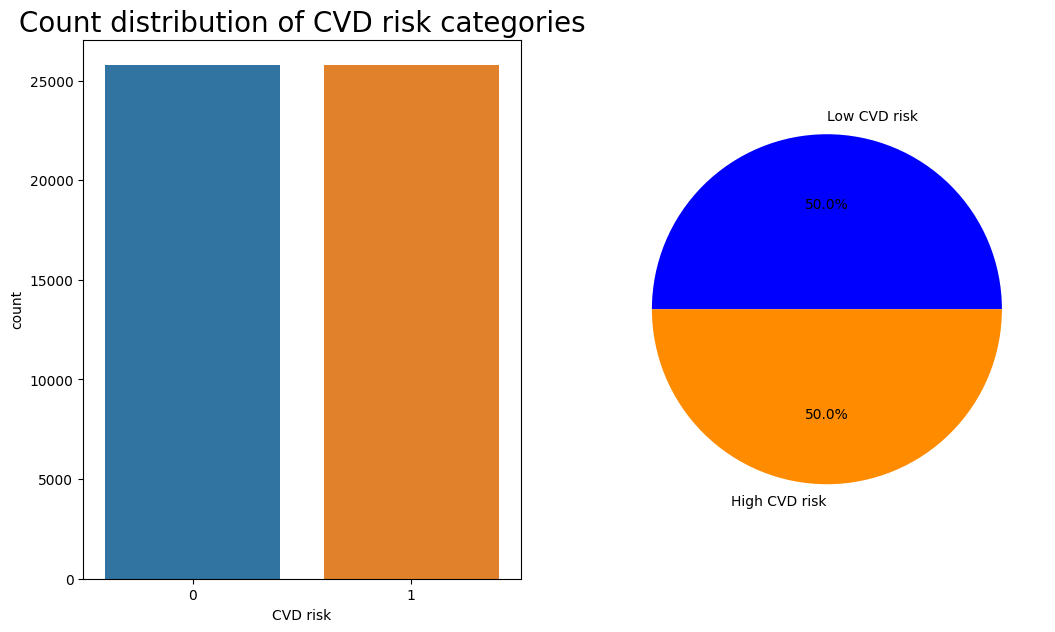

In [12]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(7, 7), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="CVD risk", data=lab_Bru_df)
plt.title("Count distribution of CVD risk categories", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(lab_Bru_df["CVD risk"].value_counts(),autopct="%1.1f%%",labels=['Low CVD risk', 'High CVD risk'],colors=["blue", "darkorange"])
plt.show()

### Train-test split 

In [13]:
##Train-test-split for non-scaled dataset

y = lab_Bru_df['CVD risk']
X = lab_Bru_df.drop(['CVD risk'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)



---

### Feature Scaling

- We have multiple features with different scales. We will use MinMaxScaler library to standardize the data in such a manner that it has mean as 0 and standard deviation as 1.
- It is crucial for distance based models e.g. KNN, SVM, to perform standardization to prevent features with wider ranges from dominating the distance metric.

In [14]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l'])

In [15]:
train_x.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l
0,0.839339,1.0,0.430020,0.0,0.0,0.271845
1,0.294294,1.0,0.219067,0.0,0.0,0.291262
2,0.789790,0.0,0.567444,1.0,0.0,0.436893
3,0.549550,1.0,0.171907,0.0,0.0,0.349515
4,0.264264,0.0,0.279919,0.0,0.0,0.339806


In [16]:
test_x.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l
0,0.624625,0.0,0.310345,0.0,1.0,0.504854
1,0.669670,0.0,0.202333,0.0,0.0,0.475728
2,0.159159,0.0,0.168357,1.0,0.0,0.378641
3,0.279279,1.0,0.259635,1.0,0.0,0.650485
4,0.189189,0.0,0.185091,0.0,0.0,0.242718


## ML Models

---

### 1- Logistic regression

- Logistic regression is usually used for Binary classification problems. Binary Classification refers to predicting the output variable that is discrete in two classes.

The accuracy score of LogisticRegression is: 71.19 %
Sensitivity (True Positive Rate) of LogisticRegression is: 72.44 %
The f1 score for LogisticRegression is 71.66 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5125
           1       0.71      0.72      0.72      5181

    accuracy                           0.71     10306
   macro avg       0.71      0.71      0.71     10306
weighted avg       0.71      0.71      0.71     10306



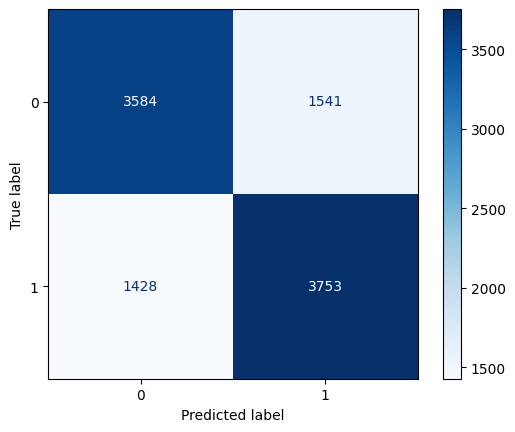

In [17]:
# Logistic Regression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model_lr = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)

# Evaluation: Confusion matrix
###############################
lr_acc = accuracy_score(test_y, lr_predict)
cm = confusion_matrix(test_y, lr_predict) 
tpr_lr = cm[1][1] /(cm[1][0] + cm[1][1])
lr_f1 = f1_score(test_y, lr_predict)
print(f'The accuracy score of {m1} is: {round(lr_acc*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m1} is: {round(tpr_lr*100,2)} %' ) 
print(f'The f1 score for {m1} is {round(lr_f1*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, lr_predict ))

ConfusionMatrixDisplay.from_estimator(lr, test_x, test_y, cmap = 'Blues')
plt.show()

#### 1.2 - Tuned Logistic regression 

Using GridSearchCV allows us to optimize our model and try to find out the best hyperparameters for our dataset.

*  penalty — Specify the norm of the penalty.
*  C — Inverse of regularization strength; smaller values specify stronger regularization

In [109]:
# search for optimun parameters using gridsearch
parameters = {
     'penalty' : ['l1','l2'],  # l1: lasso  #l2: ridge
     'C' : [0.001,0.01,0.1,1,10,100],
    'class_weight':['balanced',None]
     }
#train the classifier
tun_lr = LogisticRegression()
clf_tun1 = GridSearchCV(tun_lr,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10,
                       verbose=1,
                       n_jobs=-1)                      # number of folds GridSearchCV does an internal 5-fold cross validation
clf_tun = clf_tun1.fit(train_x,train_y)

#make predictions
tun_predict = clf_tun1.predict(test_x)
tun_accuracy = accuracy_score(test_y,tun_predict)

print("Tuned Hyperparameters :", clf_tun1.best_params_)
print(f"Accuracy : {round(tun_accuracy*100,2)} %",);

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Tuned Hyperparameters : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy : 71.37 %


The accuracy score of LogisticRegression is: 71.37%
Sensitivity (True Positive Rate) of LogisticRegression is: 72.53 %
The f1 score for LogisticRegression is 71.81%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5125
           1       0.71      0.73      0.72      5181

    accuracy                           0.71     10306
   macro avg       0.71      0.71      0.71     10306
weighted avg       0.71      0.71      0.71     10306



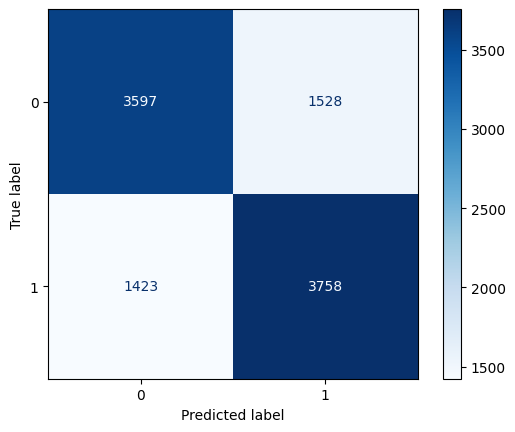

In [18]:
lr_tun = LogisticRegression(C = 0.01, class_weight = 'balanced', penalty = 'l2' )
model_lr_tun = lr_tun.fit(train_x, train_y)
lr_tun_predict = lr_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
lr_tun_acc_score = accuracy_score(test_y, lr_tun_predict)
lr_tun_conf_matrix = confusion_matrix(test_y, lr_tun_predict)
tpr_lr_tun = lr_tun_conf_matrix [1][1] /(lr_tun_conf_matrix [1][0] + lr_tun_conf_matrix [1][1])
lr_tun_f1 = f1_score(test_y, lr_tun_predict)

print(f"The accuracy score of {m1} is: {round(lr_tun_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m1} is: {round(tpr_lr_tun*100,2)} %' ) 
print(f"The f1 score for {m1} is {round(lr_tun_f1*100,2)}%")
print('\n Confusion matrix \n \n')
print(classification_report(test_y, lr_tun_predict))
ConfusionMatrixDisplay.from_estimator(lr_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

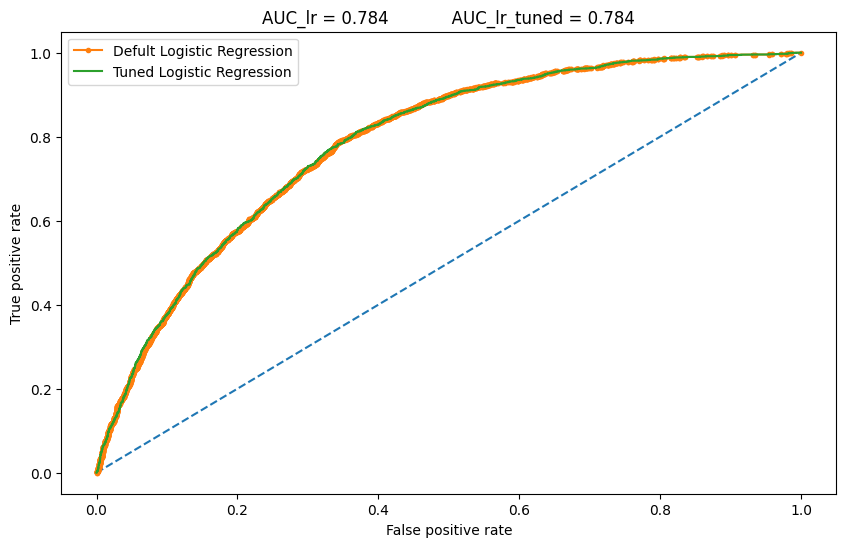

In [19]:
# ROC curve and AUC 
probs_lr = model_lr.predict_proba(test_x)
probs_lr_tun = model_lr_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
probs_lr_tun = probs_lr_tun[:, 1]
# calculate AUC
auc_lr = roc_auc_score(test_y, probs_lr)
auc_lr_tun = roc_auc_score(test_y, probs_lr_tun)
# calculate roc curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, probs_lr)
fpr_lr_tun, tpr_lr_tun, thresholds_lr_tun = roc_curve(test_y, probs_lr_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lr, tpr_lr, marker='.', label="Defult Logistic Regression")
plt.plot(fpr_lr_tun, tpr_lr_tun, label="Tuned Logistic Regression")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_lr = {round(auc_lr,3)}            AUC_lr_tuned = {round(auc_lr_tun,3)}")
plt.legend()
plt.show();

***Hyperparameter tuning gives the similar Accuracy and AUC as the defult Logistic regression model.*** 

#### Drawing Percision-Recall curve (PRC)

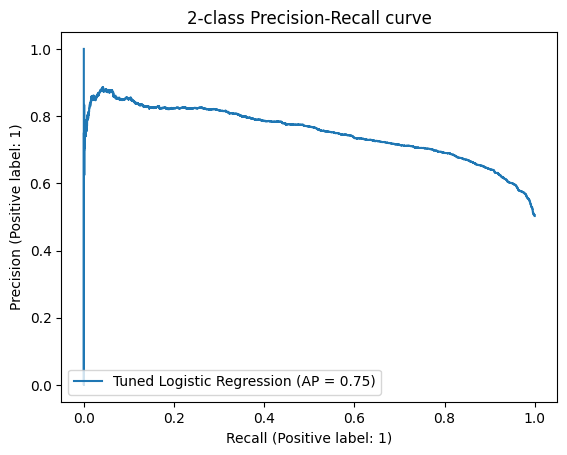

In [112]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_lr_tun, name="Tuned Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data

In [131]:
Bru_X = Bru_df.drop(['CVD risk'], axis=1)
Bru_y = Bru_df['CVD risk']
Bru_X = pd.DataFrame(scaler.fit_transform(Bru_X), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of LogisticRegression is: 69.1%
Sensitivity (True Positive Rate) of LogisticRegression is: 17.39 %
The f1 score for LogisticRegression is 2.52%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.97      0.70      0.82       977
           1       0.01      0.17      0.03        23

    accuracy                           0.69      1000
   macro avg       0.49      0.44      0.42      1000
weighted avg       0.95      0.69      0.80      1000



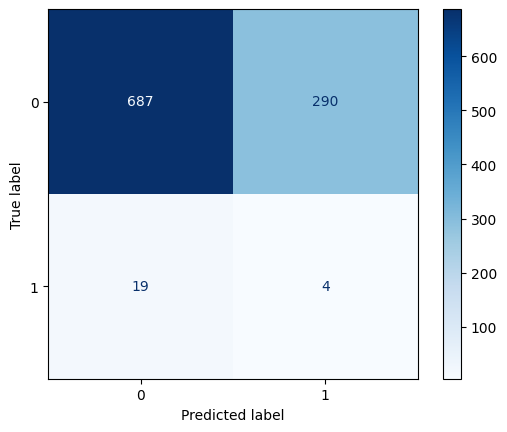

In [114]:
lr_tun = LogisticRegression(C = 0.001, class_weight =  None, penalty = 'l2' )
model_lr_tun = lr_tun.fit(train_x, train_y)
lr_tun_predict_Bru = lr_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
lr_tun_acc_score = accuracy_score(Bru_y, lr_tun_predict_Bru)
lr_tun_conf_matrix = confusion_matrix(Bru_y, lr_tun_predict_Bru)
tpr_lr_tun = lr_tun_conf_matrix [1][1] /(lr_tun_conf_matrix [1][0] + lr_tun_conf_matrix [1][1])
lr_tun_f1 = f1_score(Bru_y, lr_tun_predict_Bru)

print(f"The accuracy score of {m1} is: {round(lr_tun_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m1} is: {round(tpr_lr_tun*100,2)} %' ) 
print(f"The f1 score for {m1} is {round(lr_tun_f1*100,2)}%")
print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, lr_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(lr_tun, Bru_X, Bru_y, cmap = 'Blues')
plt.show()

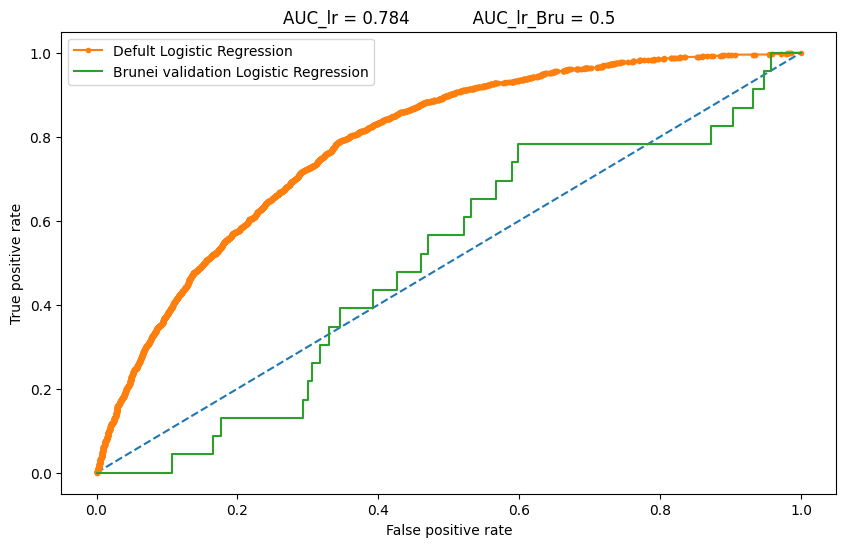

In [115]:
# ROC curve and AUC 
probs_lr = model_lr.predict_proba(test_x)
probs_lr_Bru = model_lr_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
probs_lr_Bru = probs_lr_Bru[:, 1]
# calculate AUC
auc_lr = roc_auc_score(test_y, probs_lr)
auc_lr_Bru = roc_auc_score(Bru_y, probs_lr_Bru)
# calculate roc curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, probs_lr)
fpr_lr_Bru, tpr_lr_Bru, thresholds_lr_Bru = roc_curve(Bru_y, probs_lr_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lr, tpr_lr, marker='.', label="Defult Logistic Regression")
plt.plot(fpr_lr_Bru, tpr_lr_Bru, label="Brunei validation Logistic Regression")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_lr = {round(auc_lr,3)}            AUC_lr_Bru = {round(auc_lr_Bru,3)}")
plt.legend()
plt.show();

---

### 2 - K-Nearest Neighbors 

- KNN is a widely used machine learning approach for classification tasks. An observation is classified by considering the K nearest neighbors and taking a majority vote.


In [142]:
##Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [143]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of KNeighborsClassifier is: 93.64%
Sensitivity (True Positive Rate) of KNeighborsClassifier is: 99.71 %
The f1 score for KNeighborsClassifier is 94.03%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      5134
           1       0.89      1.00      0.94      5172

    accuracy                           0.94     10306
   macro avg       0.94      0.94      0.94     10306
weighted avg       0.94      0.94      0.94     10306



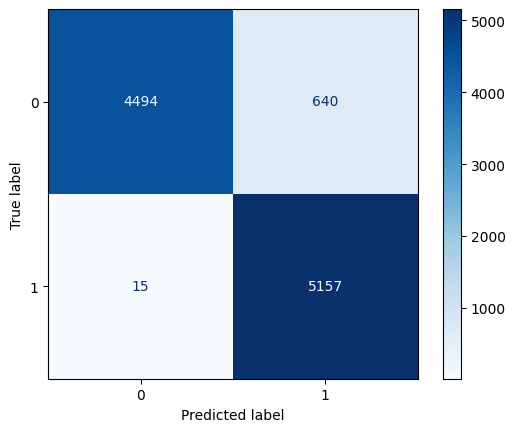

In [144]:
# K-Nearest Neighbors 
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model_knn = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)

# Evaluation: Confusion matrix#
###############################
knn_acc_score = accuracy_score(test_y, knn_predict)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
tpr_knn = knn_conf_matrix[1][1] /(knn_conf_matrix[1][0] + knn_conf_matrix[1][1])
knn_f1 = f1_score(test_y, knn_predict)

print(f"The accuracy score of {m2} is: {round(knn_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m2} is: {round(tpr_knn*100,2)} %' ) 
print(f"The f1 score for {m2} is {round(knn_f1*100,2)}%")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, knn_predict))
ConfusionMatrixDisplay.from_estimator(knn, test_x, test_y, cmap = 'Blues')
plt.show()

#### Searching for the Best value for K in KNN classifier

In [119]:
# Calculating accuracy for every value of K
n_neighbors = range(1,100,2)
training_accuracy = []
test_accuracy = []

index = 0
for n in n_neighbors:
    Knn_n = KNeighborsClassifier(n_neighbors=n)
    Knn_n.fit(train_x,train_y)
    training_accuracy.append(Knn_n.score(train_x,train_y))
    test_accuracy.append(Knn_n.score(test_x,test_y))
    print(f"Training accuracy for K = {n_neighbors[index]} nearest Neighbors: {round(training_accuracy[index]*100,2)}%")
    print(f"Test accuracy for K = {n_neighbors[index]} nearest Neighbors: {round(test_accuracy[index]*100,2)}%")

    index = index + 1  

Training accuracy for K = 1 nearest Neighbors: 99.81%
Test accuracy for K = 1 nearest Neighbors: 93.64%
Training accuracy for K = 3 nearest Neighbors: 93.72%
Test accuracy for K = 3 nearest Neighbors: 89.05%
Training accuracy for K = 5 nearest Neighbors: 89.27%
Test accuracy for K = 5 nearest Neighbors: 84.63%
Training accuracy for K = 7 nearest Neighbors: 85.9%
Test accuracy for K = 7 nearest Neighbors: 81.47%
Training accuracy for K = 9 nearest Neighbors: 83.25%
Test accuracy for K = 9 nearest Neighbors: 78.8%
Training accuracy for K = 11 nearest Neighbors: 81.29%
Test accuracy for K = 11 nearest Neighbors: 77.36%
Training accuracy for K = 13 nearest Neighbors: 79.97%
Test accuracy for K = 13 nearest Neighbors: 76.63%
Training accuracy for K = 15 nearest Neighbors: 79.26%
Test accuracy for K = 15 nearest Neighbors: 76.18%
Training accuracy for K = 17 nearest Neighbors: 78.56%
Test accuracy for K = 17 nearest Neighbors: 75.75%
Training accuracy for K = 19 nearest Neighbors: 78.07%
Tes

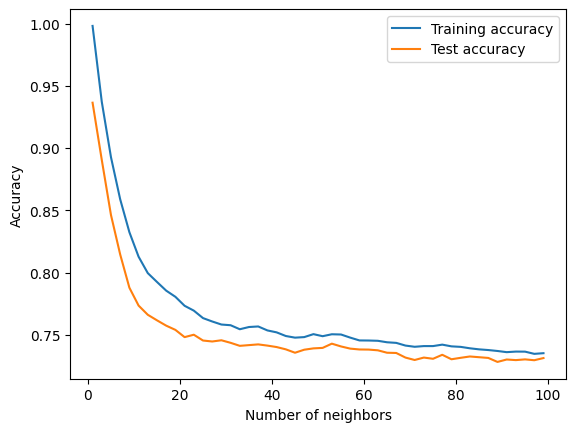

In [120]:
# plotting KNN training vs testing accuracy
plt.plot(n_neighbors, training_accuracy, label="Training accuracy")
plt.plot(n_neighbors, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend();

In [121]:
# grid search for optimum parameters
param_n_neighbors = {'n_neighbors': range(1,100,1)}
knn_clf = GridSearchCV(knn, param_grid=param_n_neighbors,verbose=2,cv=3, n_jobs=-1)

In [122]:
# train the model
knn_clf.fit(train_x,train_y)
knn_clf.best_params_

Fitting 3 folds for each of 99 candidates, totalling 297 fits


{'n_neighbors': 1}

#### 2.2 - Tuned K-Nearest Neighbors 

The accuracy score of KNeighborsClassifier is: 93.64%
Sensitivity (True Positive Rate) of KNeighborsClassifier is: 99.71 %
The f1 score for KNeighborsClassifier is 94.03%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      5134
           1       0.89      1.00      0.94      5172

    accuracy                           0.94     10306
   macro avg       0.94      0.94      0.94     10306
weighted avg       0.94      0.94      0.94     10306



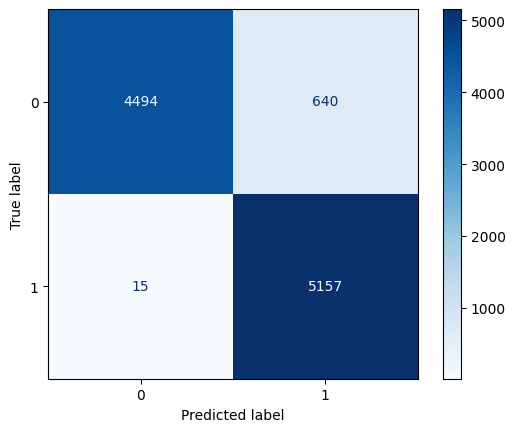

In [58]:
knn_tun = KNeighborsClassifier(n_neighbors=1)
model_knn_tun = knn_tun.fit(train_x, train_y)
knn_tun_predict = knn_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
knn_tun_acc_score = accuracy_score(test_y, knn_tun_predict)
knn_tun_conf_matrix = confusion_matrix(test_y, knn_tun_predict)
tpr_knn_tun = knn_tun_conf_matrix [1][1] /(knn_tun_conf_matrix [1][0] + knn_tun_conf_matrix [1][1])
knn_tun_f1 = f1_score(test_y, knn_tun_predict)

print(f"The accuracy score of {m2} is: {round(knn_tun_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m2} is: {round(tpr_knn_tun*100,2)} %' ) 
print(f"The f1 score for {m2} is {round(knn_tun_f1*100,2)}%")
print('\n Confusion matrix \n \n')
print(classification_report(test_y, knn_tun_predict))
ConfusionMatrixDisplay.from_estimator(knn_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

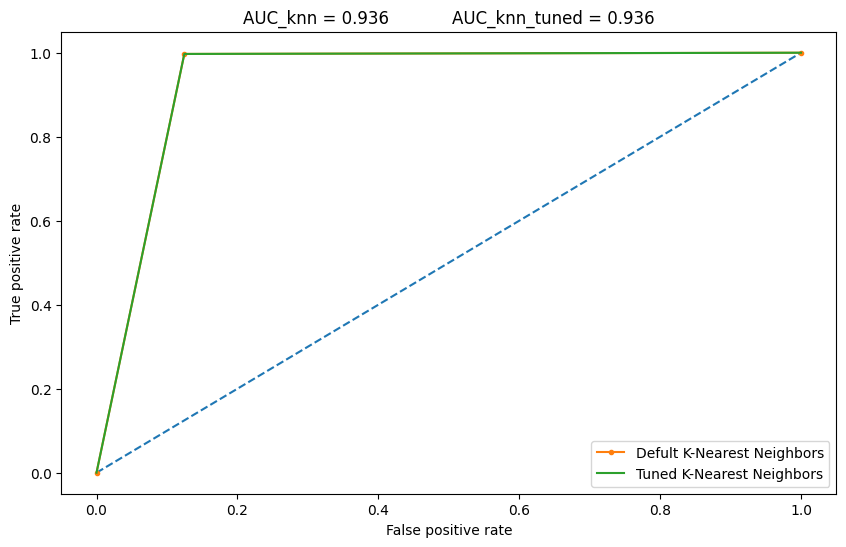

In [87]:
# ROC curve and AUC 
probs_knn = model_knn.predict_proba(test_x)
probs_knn_tun = model_knn_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_knn = probs_knn[:, 1]
probs_knn_tun = probs_knn_tun[:, 1]
# calculate AUC
auc_knn = roc_auc_score(test_y, probs_knn)
auc_knn_tun = roc_auc_score(test_y, probs_knn_tun)
# calculate roc curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, probs_knn)
fpr_knn_tun, tpr_knn_tun, thresholds_knn_tun = roc_curve(test_y, probs_knn_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_knn, tpr_knn, marker='.', label="Defult K-Nearest Neighbors")
plt.plot(fpr_knn_tun, tpr_knn_tun, label="Tuned K-Nearest Neighbors")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_knn = {round(auc_knn,3)}            AUC_knn_tuned = {round(auc_knn_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

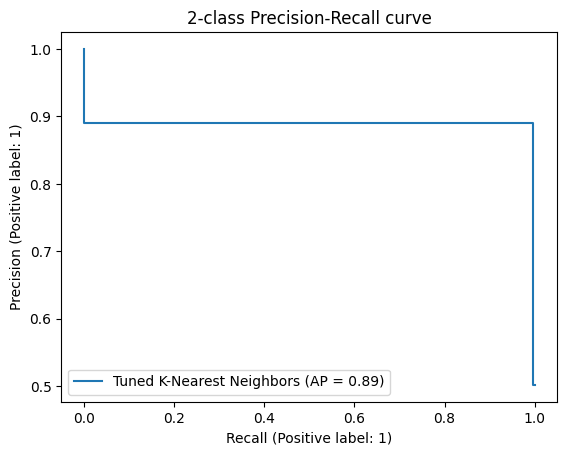

In [125]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_knn_tun, name="Tuned K-Nearest Neighbors")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data

The accuracy score of KNeighborsClassifier is: 81.8%
Sensitivity (True Positive Rate) of KNeighborsClassifier is: 17.39 %
The f1 score for KNeighborsClassifier is 4.21%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       977
           1       0.02      0.17      0.04        23

    accuracy                           0.82      1000
   macro avg       0.50      0.50      0.47      1000
weighted avg       0.96      0.82      0.88      1000



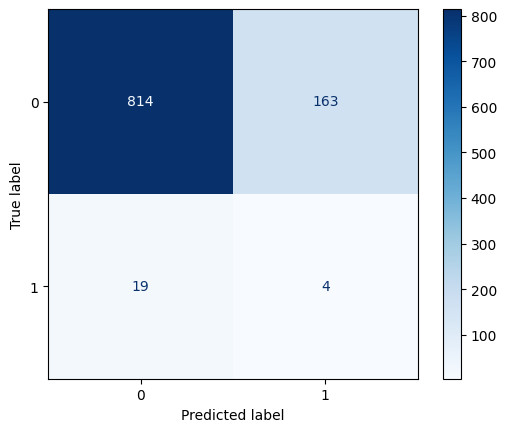

In [145]:
knn_tun = KNeighborsClassifier(n_neighbors=1)
model_knn_tun = knn_tun.fit(train_x, train_y)
knn_tun_predict_Bru = knn_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
knn_tun_acc_score_Bru = accuracy_score(Bru_y, knn_tun_predict_Bru)
knn_tun_conf_matrix_Bru = confusion_matrix(Bru_y, knn_tun_predict_Bru)
tpr_knn_tun_Bru = knn_tun_conf_matrix_Bru[1][1] /(knn_tun_conf_matrix_Bru [1][0] + knn_tun_conf_matrix_Bru [1][1])
knn_tun_f1_Bru = f1_score(Bru_y, knn_tun_predict_Bru)

print(f"The accuracy score of {m2} is: {round(knn_tun_acc_score_Bru*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m2} is: {round(tpr_knn_tun_Bru*100,2)} %' ) 
print(f"The f1 score for {m2} is {round(knn_tun_f1_Bru*100,2)}%")
print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, knn_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(knn_tun, Bru_X, Bru_y, cmap = 'Blues')
plt.show()

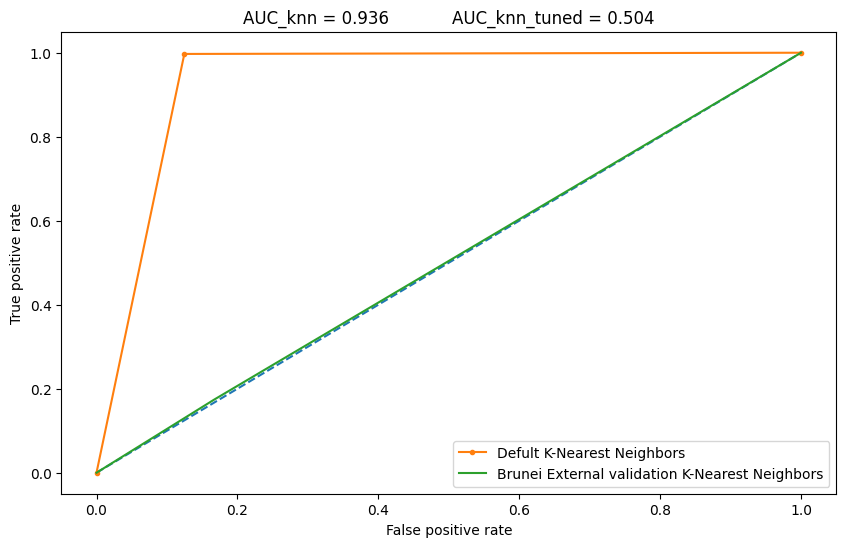

In [146]:
# ROC curve and AUC 
probs_knn = model_knn.predict_proba(test_x)
probs_knn_Bru = model_knn_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_knn = probs_knn[:, 1]
probs_knn_Bru = probs_knn_Bru[:, 1]
# calculate AUC
auc_knn = roc_auc_score(test_y, probs_knn)
auc_knn_Bru = roc_auc_score(Bru_y, probs_knn_Bru)
# calculate roc curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, probs_knn)
fpr_knn_Bru, tpr_knn_Bru, thresholds_knn_Bru = roc_curve(Bru_y, probs_knn_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_knn, tpr_knn, marker='.', label="Defult K-Nearest Neighbors")
plt.plot(fpr_knn_Bru, tpr_knn_Bru, label="Brunei External validation K-Nearest Neighbors")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_knn = {round(auc_knn,3)}            AUC_knn_tuned = {round(auc_knn_Bru,3)}")
plt.legend()
plt.show();

---

### 3 - Decision Tree Classifier

In [137]:
##Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=3)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [138]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of DecisionTreeClassifier is: 93.29 %
Sensitivity (True Positive Rate) = 99.68 %
The f1 score for DecisionTreeClassifier is 93.57 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      5252
           1       0.88      1.00      0.94      5054

    accuracy                           0.93     10306
   macro avg       0.94      0.93      0.93     10306
weighted avg       0.94      0.93      0.93     10306



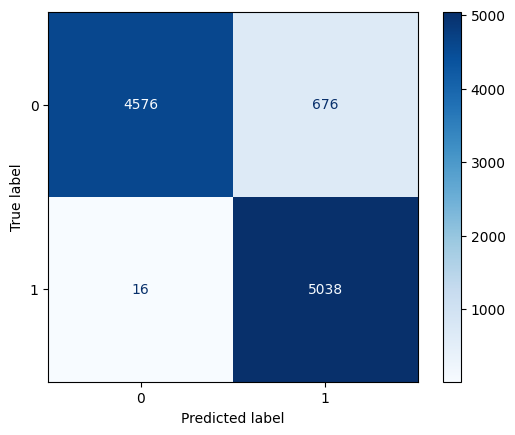

In [139]:
# Decision Tree Classifier 
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=0)
model_dt = dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)

# Evaluation: Confusion matrix#
###############################
dt_acc_score = accuracy_score(test_y, dt_predicted)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_tpr = dt_conf_matrix[1][1] /(dt_conf_matrix[1][0] + dt_conf_matrix[1][1])
dt_f1 = f1_score(test_y, dt_predicted)

print(f"The accuracy score of {m3} is: {round(dt_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) = {round(dt_tpr*100,2)} %' ) 
print(f"The f1 score for {m3} is {round(dt_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, dt_predicted))
ConfusionMatrixDisplay.from_estimator(dt, test_x, test_y, cmap = 'Blues')
plt.show()

#### Searching for the Best Max_Depth for Decision Tree classifier

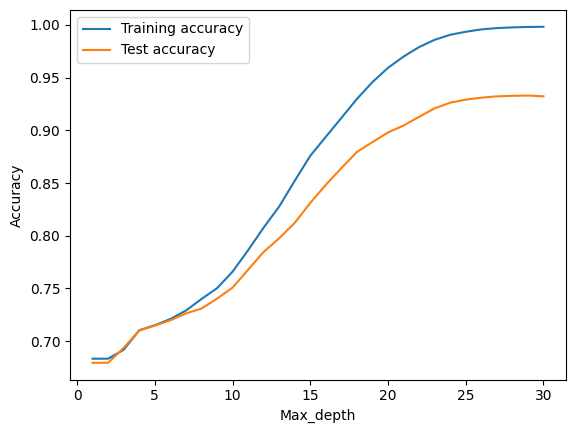

In [129]:
#Hyperparameter tuning for max_depth
train_acc1 = []
test_acc1 = []

for max_d in range(1,31):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=0)
  model.fit(train_x, train_y)
  train_acc1.append(model.score(train_x, train_y))
  test_acc1.append(model.score(test_x,test_y))

# plotting KNN training vs testing accuracy
plt.plot([*range(1,31)], train_acc1, label="Training accuracy")
plt.plot([*range(1,31)], test_acc1, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

#### Grid Search for optimum parameters

In [130]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'criterion': ['gini', 'entropy'],
         'max_depth' :range(1,31)}
tree_clf = GridSearchCV(dt, param_grid=params,verbose=2,cv=3, n_jobs=-1)

In [131]:
# train the model
tree_clf.fit(train_x,train_y)
tree_clf.best_params_

Fitting 3 folds for each of 27720 candidates, totalling 83160 fits


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### 3.2 - Tuned Decision Tree

The accuracy score of DecisionTreeClassifier is: 93.41 %
Sensitivity (True Positive Rate) = 99.31 %
The f1 score for DecisionTreeClassifier is 93.66 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      5252
           1       0.89      0.99      0.94      5054

    accuracy                           0.93     10306
   macro avg       0.94      0.94      0.93     10306
weighted avg       0.94      0.93      0.93     10306



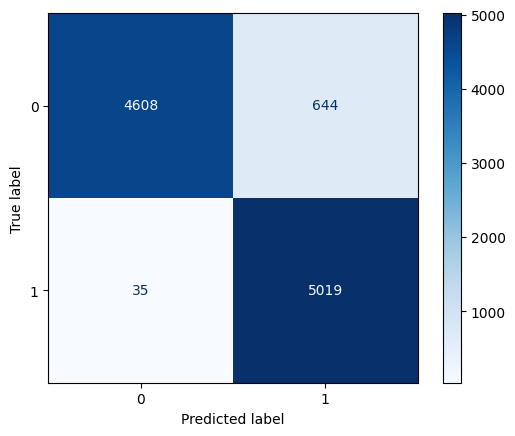

In [62]:
dt_tun = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth= 30,
                                max_features = 'auto',
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                random_state=0)
model_dt_tun = dt_tun.fit(train_x,train_y)
dt_tun_predicted = dt_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
dt_tun_acc_score = accuracy_score(test_y, dt_tun_predicted)
dt_tun_conf_matrix = confusion_matrix(test_y, dt_tun_predicted)
dt_tun_tpr = dt_tun_conf_matrix[1][1] /(dt_tun_conf_matrix[1][0] + dt_tun_conf_matrix[1][1])
dt_tun_f1 = f1_score(test_y, dt_tun_predicted)

print(f"The accuracy score of {m3} is: {round(dt_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) = {round(dt_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m3} is {round(dt_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, dt_tun_predicted))
ConfusionMatrixDisplay.from_estimator(dt_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

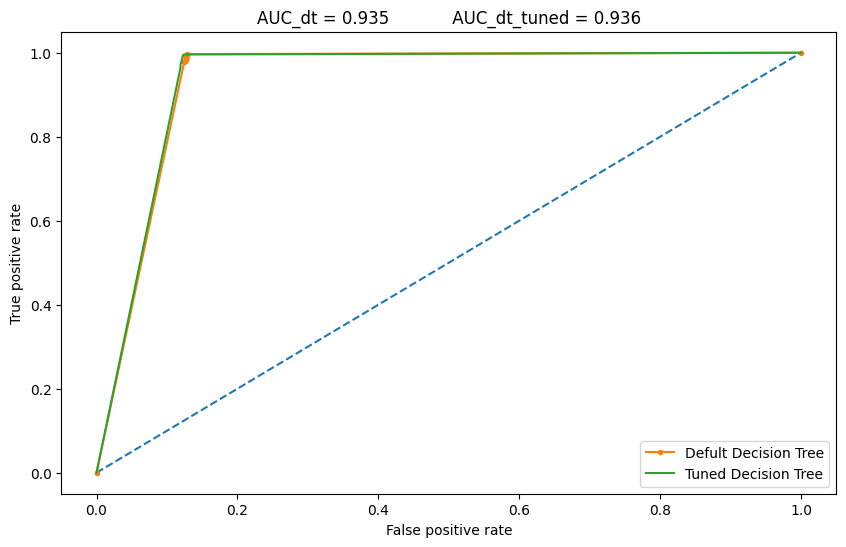

In [90]:
# ROC curve and AUC 
probs_dt = model_dt.predict_proba(test_x)
probs_dt_tun = model_dt_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]
probs_dt_tun = probs_dt_tun[:, 1]
# calculate AUC
auc_dt = roc_auc_score(test_y, probs_dt)
auc_dt_tun = roc_auc_score(test_y, probs_dt_tun)
# calculate roc curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y, probs_dt)
fpr_dt_tun, tpr_dt_tun, thresholds_dt_tun = roc_curve(test_y, probs_dt_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dt, tpr_dt, marker='.', label="Defult Decision Tree")
plt.plot(fpr_dt_tun, tpr_dt_tun, label="Tuned Decision Tree")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_dt = {round(auc_dt,3)}            AUC_dt_tuned = {round(auc_dt_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

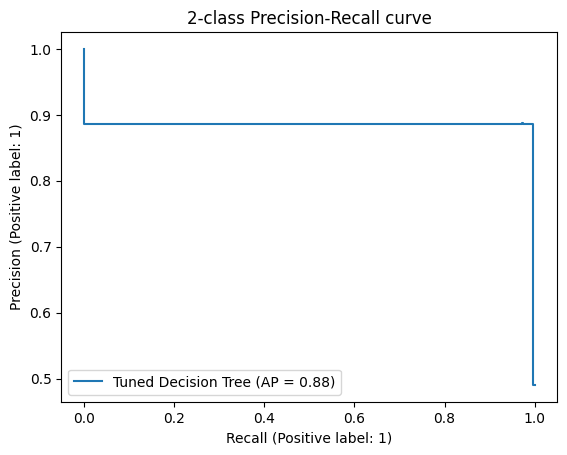

In [134]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_dt_tun, name="Tuned Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data

The accuracy score of DecisionTreeClassifier is: 81.6 %
Sensitivity (True Positive Rate) = 13.04 %
The f1 score for DecisionTreeClassifier is 3.16 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       977
           1       0.02      0.13      0.03        23

    accuracy                           0.82      1000
   macro avg       0.50      0.48      0.46      1000
weighted avg       0.95      0.82      0.88      1000



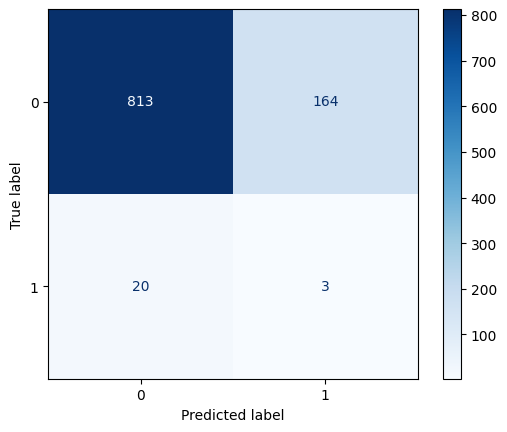

In [140]:
dt_tun = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth= 30,
                                max_features = 'auto',
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                random_state=0)
model_dt_tun = dt_tun.fit(train_x,train_y)
model_dt_tun = dt_tun.fit(train_x, train_y)
dt_tun_predict_Bru = dt_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
dt_tun_acc_score_Bru = accuracy_score(Bru_y, dt_tun_predict_Bru)
dt_tun_conf_matrix_Bru = confusion_matrix(Bru_y, dt_tun_predict_Bru)
dt_tun_tpr_Bru = dt_tun_conf_matrix_Bru[1][1] /(dt_tun_conf_matrix_Bru[1][0] + dt_tun_conf_matrix_Bru[1][1])
dt_tun_f1_Bru = f1_score(Bru_y, dt_tun_predict_Bru)

print(f"The accuracy score of {m3} is: {round(dt_tun_acc_score_Bru*100,2)} %")
print(f'Sensitivity (True Positive Rate) = {round(dt_tun_tpr_Bru*100,2)} %' ) 
print(f"The f1 score for {m3} is {round(dt_tun_f1_Bru*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, dt_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(dt_tun, Bru_X, Bru_y, cmap = 'Blues')
plt.show()

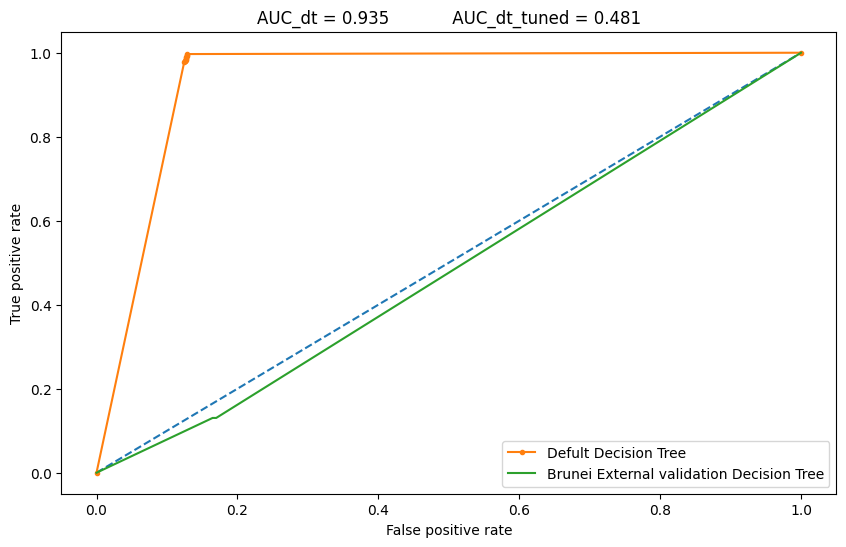

In [141]:
# ROC curve and AUC 
probs_dt = model_dt.predict_proba(test_x)
probs_dt_Bru = model_dt_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]
probs_dt_Bru = probs_dt_Bru[:, 1]
# calculate AUC
auc_dt = roc_auc_score(test_y, probs_dt)
auc_dt_Bru = roc_auc_score(Bru_y, probs_dt_Bru)
# calculate roc curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y, probs_dt)
fpr_dt_Bru, tpr_dt_Bru, thresholds_dt_Bru = roc_curve(Bru_y, probs_dt_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dt, tpr_dt, marker='.', label="Defult Decision Tree")
plt.plot(fpr_dt_Bru, tpr_dt_Bru, label="Brunei External validation Decision Tree")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_dt = {round(auc_dt,3)}            AUC_dt_tuned = {round(auc_dt_Bru,3)}")
plt.legend()
plt.show();

---

### 4 - Random Forest Classifier

In [147]:
##Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [148]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of Random Forest Classfier is: 95.08 %
Sensitivity (True Positive Rate) of Random Forest Classfier = 99.47 %
The f1 score for Random Forest Classfier is 95.27 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5172
           1       0.91      0.99      0.95      5134

    accuracy                           0.95     10306
   macro avg       0.95      0.95      0.95     10306
weighted avg       0.95      0.95      0.95     10306



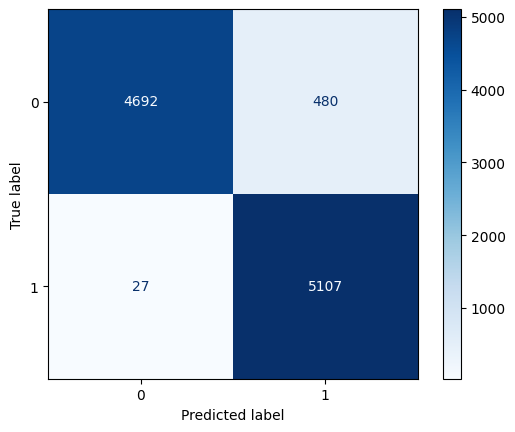

In [149]:
# Random Forest Classfier 
m4 = 'Random Forest Classfier'
rf = RandomForestClassifier(random_state=0)
model_rf = rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)

# Evaluation: Confusion matrix#
###############################
rf_acc_score = accuracy_score(test_y, rf_predicted)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_tpr = rf_conf_matrix[1][1] /(rf_conf_matrix[1][0] + rf_conf_matrix[1][1])
rf_f1 = f1_score(test_y, rf_predicted)

print(f"The accuracy score of {m4} is: {round(rf_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m4} = {round(rf_tpr*100,2)} %' ) 
print(f"The f1 score for {m4} is {round(rf_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, rf_predicted))
ConfusionMatrixDisplay.from_estimator(rf, test_x, test_y, cmap = 'Blues')
plt.show()

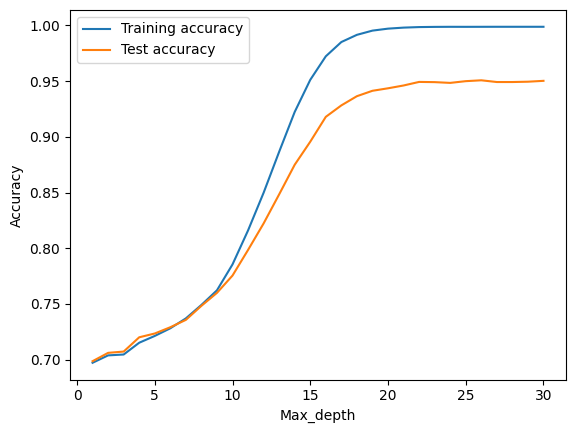

In [138]:
#Hyperparameter tuning for max_depth
train_acc2 = []
test_acc2 = []
max_depth = range(1,31)

for max_d in max_depth:
  model2 = RandomForestClassifier(max_depth=max_d, random_state=0)
  model2.fit(train_x, train_y)
  train_acc2.append(model2.score(train_x, train_y))
  test_acc2.append(model2.score(test_x,test_y))

# plotting KNN training vs testing accuracy
plt.plot(max_depth, train_acc2, label="Training accuracy")
plt.plot(max_depth, test_acc2, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

#### Random Search for optimum parameters for Random Forest Classifier

In [139]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

max_depth = list(range(1,31))

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [140]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [141]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 24,
 'bootstrap': False}

#### 4.2 - Tuned Random Forest

The accuracy score of Random Forest Classfier is: 96.3 %
Sensitivity (True Positive Rate) of Random Forest Classfier is: 99.45 %
The f1 score for Random Forest Classfier is 96.4 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5172
           1       0.94      0.99      0.96      5134

    accuracy                           0.96     10306
   macro avg       0.96      0.96      0.96     10306
weighted avg       0.96      0.96      0.96     10306



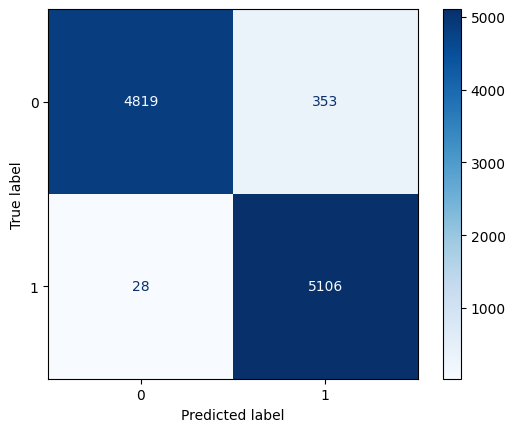

In [150]:
rf_tun = RandomForestClassifier(max_depth=24, min_samples_split=2, n_estimators=400, min_samples_leaf = 1,
                                max_features= 'auto', bootstrap = False, random_state=0)
model_rf_tun = rf_tun.fit(train_x,train_y)
rf_tun_predicted = rf_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
rf_tun_acc_score = accuracy_score(test_y, rf_tun_predicted)
rf_tun_conf_matrix = confusion_matrix(test_y, rf_tun_predicted)
rf_tun_tpr = rf_tun_conf_matrix[1][1] /(rf_tun_conf_matrix[1][0] + rf_tun_conf_matrix[1][1])
rf_tun_f1 = f1_score(test_y, rf_tun_predicted)

print(f"The accuracy score of {m4} is: {round(rf_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m4} is: {round(rf_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m4} is {round(rf_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, rf_tun_predicted))
ConfusionMatrixDisplay.from_estimator(rf_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

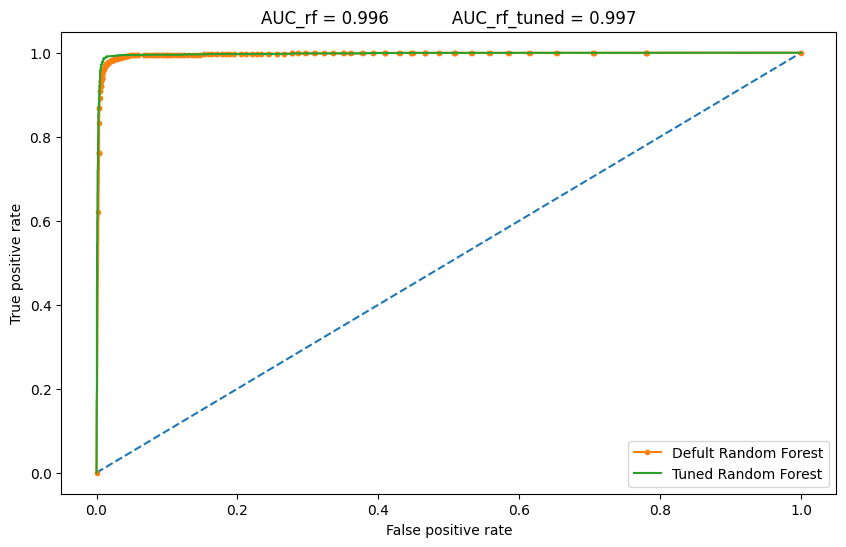

In [96]:
# ROC curve and AUC 
probs_rf = model_rf.predict_proba(test_x)
probs_rf_tun = model_rf_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
probs_rf_tun = probs_rf_tun[:, 1]
# calculate AUC
auc_rf = roc_auc_score(test_y, probs_rf)
auc_rf_tun = roc_auc_score(test_y, probs_rf_tun)
# calculate roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, probs_rf)
fpr_rf_tun, tpr_rf_tun, thresholds_rf_tun = roc_curve(test_y, probs_rf_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rf, tpr_rf, marker='.', label="Defult Random Forest")
plt.plot(fpr_rf_tun, tpr_rf_tun, label="Tuned Random Forest")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_rf = {round(auc_rf,3)}            AUC_rf_tuned = {round(auc_rf_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

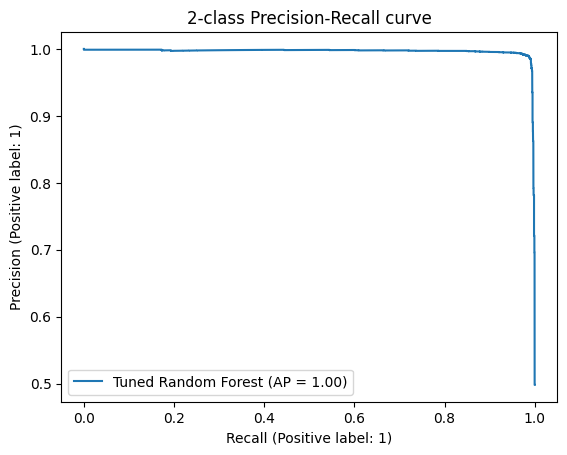

In [144]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_rf_tun, name="Tuned Random Forest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data

The accuracy score of Random Forest Classfier is: 92.1 %
Sensitivity (True Positive Rate) of Random Forest Classfier is: 8.7 %
The f1 score for Random Forest Classfier is 4.82 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       977
           1       0.03      0.09      0.05        23

    accuracy                           0.92      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.96      0.92      0.94      1000



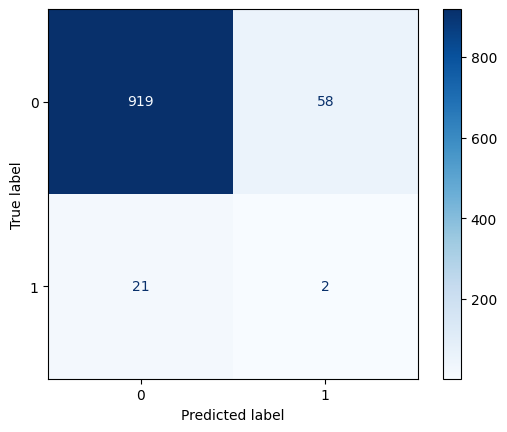

In [151]:
rf_tun = RandomForestClassifier(max_depth=24, min_samples_split=2, n_estimators=400, min_samples_leaf = 1,
                                max_features= 'auto', bootstrap = False, random_state=0)
model_rf_tun = rf_tun.fit(train_x,train_y)
rf_tun_predict_Bru = rf_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
rf_tun_acc_score_Bru = accuracy_score(Bru_y, rf_tun_predict_Bru)
rf_tun_conf_matrix_Bru = confusion_matrix(Bru_y, rf_tun_predict_Bru)
rf_tun_tpr_Bru = rf_tun_conf_matrix_Bru[1][1] /(rf_tun_conf_matrix_Bru[1][0] + rf_tun_conf_matrix_Bru[1][1])
rf_tun_f1_Bru = f1_score(Bru_y, rf_tun_predict_Bru)

print(f"The accuracy score of {m4} is: {round(rf_tun_acc_score_Bru*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m4} is: {round(rf_tun_tpr_Bru*100,2)} %' ) 
print(f"The f1 score for {m4} is {round(rf_tun_f1_Bru*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, rf_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(rf_tun, Bru_X , Bru_y, cmap = 'Blues')
plt.show()

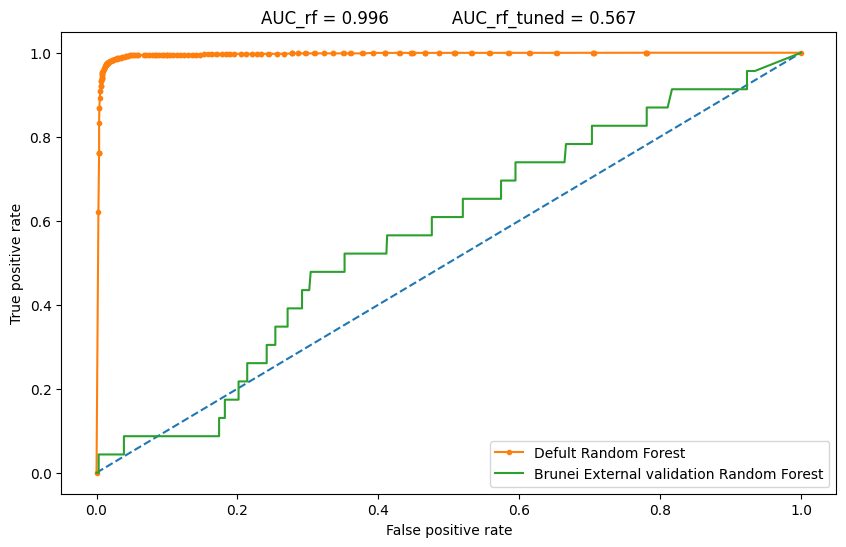

In [152]:
#ROC curve and AUC 
probs_rf = model_rf.predict_proba(test_x)
probs_rf_Bru = model_rf_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
probs_rf_Bru = probs_rf_Bru[:, 1]
# calculate AUC
auc_rf = roc_auc_score(test_y, probs_rf)
auc_rf_Bru = roc_auc_score(Bru_y, probs_rf_Bru)
# calculate roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, probs_rf)
fpr_rf_Bru, tpr_rf_Bru, thresholds_rf_Bru = roc_curve(Bru_y, probs_rf_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rf, tpr_rf, marker='.', label="Defult Random Forest")
plt.plot(fpr_rf_Bru, tpr_rf_Bru, label="Brunei External validation Random Forest")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_rf = {round(auc_rf,3)}            AUC_rf_tuned = {round(auc_rf_Bru,3)}")
plt.legend()
plt.show();

---

### 5 - Gradient Boosting Classifier

In [153]:
##Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=5)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [154]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of Gradient Boosting Classifier is: 73.05 %
Sensitivity (True Positive Rate) of Gradient Boosting Classifier = 79.22 %
The f1 score for Gradient Boosting Classifier is 74.5 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.77      0.67      0.71      5186
           1       0.70      0.79      0.74      5120

    accuracy                           0.73     10306
   macro avg       0.73      0.73      0.73     10306
weighted avg       0.73      0.73      0.73     10306



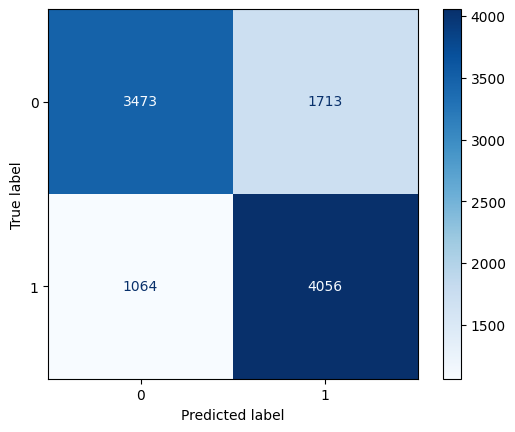

In [155]:
# Random Forest Classfier 
m5 = 'Gradient Boosting Classifier'
gb = GradientBoostingClassifier(random_state=0)
model_gb = gb.fit(train_x,train_y)
gb_predicted = gb.predict(test_x)

# Evaluation: Confusion matrix#
###############################
gb_acc_score = accuracy_score(test_y, gb_predicted)
gb_conf_matrix = confusion_matrix(test_y, gb_predicted)
gb_tpr = gb_conf_matrix[1][1] /(gb_conf_matrix[1][0] + gb_conf_matrix[1][1])
gb_f1 = f1_score(test_y, gb_predicted)

print(f"The accuracy score of {m5} is: {round(gb_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m5} = {round(gb_tpr*100,2)} %' ) 
print(f"The f1 score for {m5} is {round(gb_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, gb_predicted))
ConfusionMatrixDisplay.from_estimator(gb, test_x, test_y, cmap = 'Blues')
plt.show()

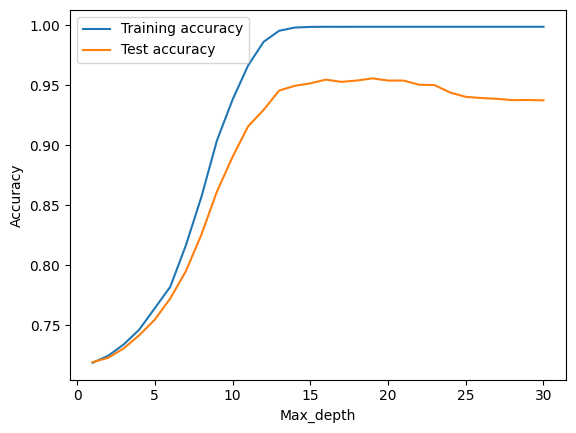

In [148]:
#Hyperparameter tuning for max_depth
train_acc3 = []
test_acc3 = []
max_depth = range(1,31)

for max_d in max_depth:
  model3 = GradientBoostingClassifier(max_depth=max_d, random_state=0)
  model3.fit(train_x, train_y)
  train_acc3.append(model3.score(train_x, train_y))
  test_acc3.append(model3.score(test_x,test_y))

# plotting KNN training vs testing accuracy
plt.plot(max_depth, train_acc3, label="Training accuracy")
plt.plot(max_depth, test_acc3, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

In [149]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Minimum number of samples required to split a node
min_samples_split=[2,5,10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

max_depth = list(range(1,31))

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [150]:
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3, 
                               verbose=2, 
                               random_state=0, 
                               n_jobs=-1,
                               return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=0, return_train_score=True, verbose=2)

In [151]:
gb_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 21}

#### 5.2 - Tuned Gradient Boosting Classifier

The accuracy score of Gradient Boosting Classifier is: 96.8 %
Sensitivity (True Positive Rate) of Gradient Boosting Classifier is: 99.77 %
The f1 score for Gradient Boosting Classifier is 96.87 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      5186
           1       0.94      1.00      0.97      5120

    accuracy                           0.97     10306
   macro avg       0.97      0.97      0.97     10306
weighted avg       0.97      0.97      0.97     10306



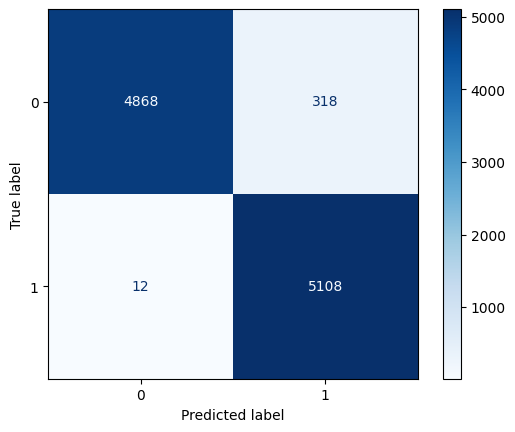

In [156]:
gb_tun =  GradientBoostingClassifier(n_estimators= 200, 
                                     min_samples_split= 2,
                                     min_samples_leaf =1,
                                     max_features = 'sqrt',
                                     max_depth = 21,
                                     random_state=0)
model_gb_tun = gb_tun.fit(train_x,train_y)
gb_tun_predicted = gb_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
gb_tun_acc_score = accuracy_score(test_y, gb_tun_predicted)
gb_tun_conf_matrix = confusion_matrix(test_y, gb_tun_predicted)
gb_tun_tpr = gb_tun_conf_matrix[1][1] /(gb_tun_conf_matrix[1][0] + gb_tun_conf_matrix[1][1])
gb_tun_f1 = f1_score(test_y, gb_tun_predicted)

print(f"The accuracy score of {m5} is: {round(gb_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m5} is: {round(gb_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m5} is {round(gb_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, gb_tun_predicted))
ConfusionMatrixDisplay.from_estimator(gb_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

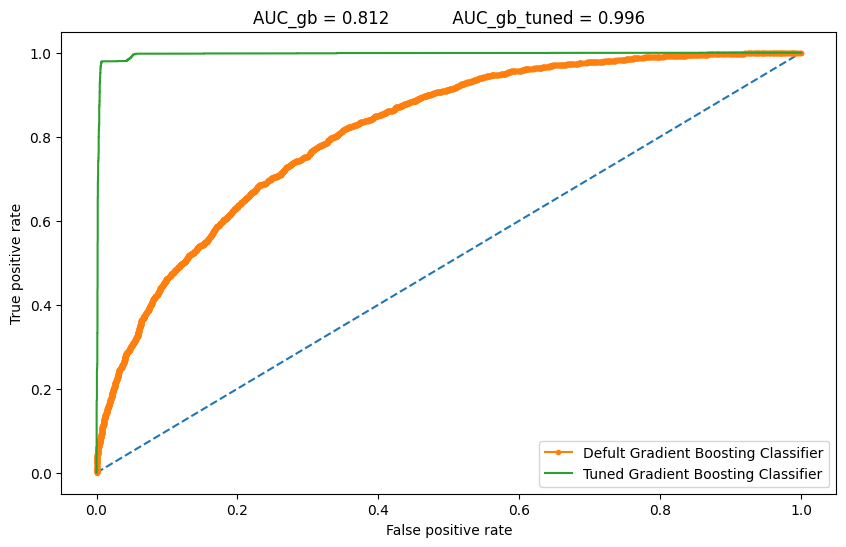

In [99]:
# ROC curve and AUC 
probs_gb = model_gb.predict_proba(test_x)
probs_gb_tun = model_gb_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
probs_gb_tun = probs_gb_tun[:, 1]
# calculate AUC
auc_gb = roc_auc_score(test_y, probs_gb)
auc_gb_tun = roc_auc_score(test_y, probs_gb_tun)
# calculate roc curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(test_y, probs_gb)
fpr_gb_tun, tpr_gb_tun, thresholds_gb_tun = roc_curve(test_y, probs_gb_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gb, tpr_gb, marker='.', label="Defult Gradient Boosting Classifier")
plt.plot(fpr_gb_tun, tpr_gb_tun, label="Tuned Gradient Boosting Classifier")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_gb = {round(auc_gb,3)}            AUC_gb_tuned = {round(auc_gb_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

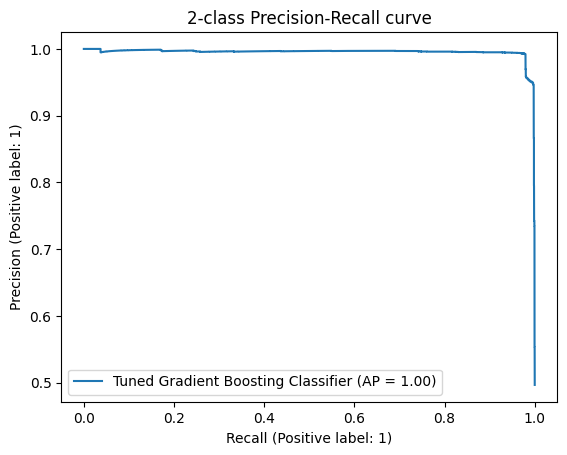

In [154]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_gb_tun, name="Tuned Gradient Boosting Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data

The accuracy score of Gradient Boosting Classifier is: 92.5 %
Sensitivity (True Positive Rate) of Gradient Boosting Classifier is: 8.7 %
The f1 score for Gradient Boosting Classifier is 5.06 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       977
           1       0.04      0.09      0.05        23

    accuracy                           0.93      1000
   macro avg       0.51      0.52      0.51      1000
weighted avg       0.96      0.93      0.94      1000



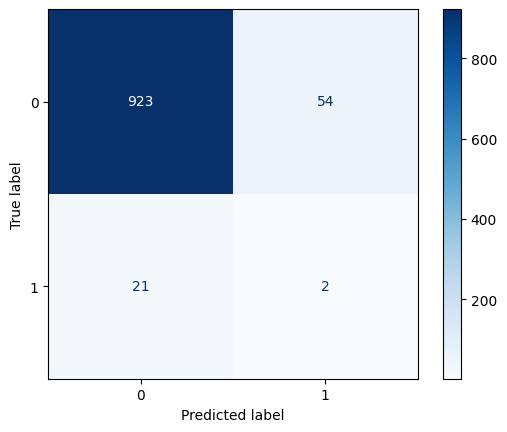

In [157]:
gb_tun =  GradientBoostingClassifier(n_estimators= 200, 
                                     min_samples_split= 2,
                                     min_samples_leaf =1,
                                     max_features = 'sqrt',
                                     max_depth = 21,
                                     random_state=0)
model_gb_tun = gb_tun.fit(train_x,train_y)
gb_tun_predict_Bru = gb_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
gb_tun_acc_score_Bru = accuracy_score(Bru_y, gb_tun_predict_Bru)
gb_tun_conf_matrix_Bru = confusion_matrix(Bru_y, gb_tun_predict_Bru)
gb_tun_tpr_Bru = gb_tun_conf_matrix_Bru[1][1] /(gb_tun_conf_matrix_Bru[1][0] + gb_tun_conf_matrix_Bru[1][1])
gb_tun_f1_Bru = f1_score(Bru_y, gb_tun_predict_Bru)

print(f"The accuracy score of {m5} is: {round(gb_tun_acc_score_Bru*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m5} is: {round(gb_tun_tpr_Bru*100,2)} %' ) 
print(f"The f1 score for {m5} is {round(gb_tun_f1_Bru*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, gb_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(gb_tun, Bru_X, Bru_y, cmap = 'Blues')
plt.show()

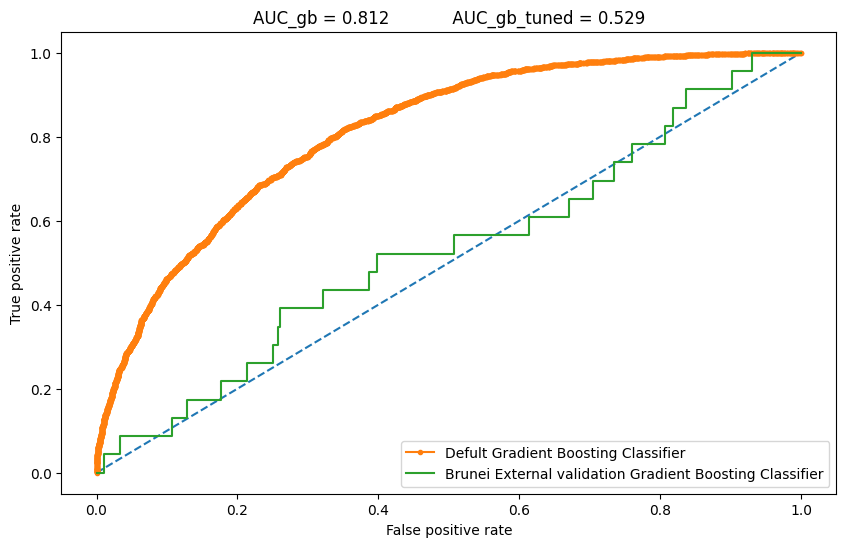

In [158]:
# ROC curve and AUC 
probs_gb = model_gb.predict_proba(test_x)
probs_gb_Bru = model_gb_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
probs_gb_Bru = probs_gb_Bru[:, 1]
# calculate AUC
auc_gb = roc_auc_score(test_y, probs_gb)
auc_gb_Bru = roc_auc_score(Bru_y, probs_gb_Bru)
# calculate roc curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(test_y, probs_gb)
fpr_gb_Bru, tpr_gb_Bru, thresholds_gb_Bru = roc_curve(Bru_y, probs_gb_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gb, tpr_gb, marker='.', label="Defult Gradient Boosting Classifier")
plt.plot(fpr_gb_Bru, tpr_gb_Bru, label="Brunei External validation Gradient Boosting Classifier")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_gb = {round(auc_gb,3)}            AUC_gb_tuned = {round(auc_gb_Bru,3)}")
plt.legend()
plt.show();

---

### 6 - Support Vector Machine

In [159]:
##Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=6)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [160]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of Support Vector Machine is: 72.11 %
Sensitivity (True Positive Rate) of Support Vector Machine = 75.98 %
The f1 score for Support Vector Machine is 73.12 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      5161
           1       0.70      0.76      0.73      5145

    accuracy                           0.72     10306
   macro avg       0.72      0.72      0.72     10306
weighted avg       0.72      0.72      0.72     10306



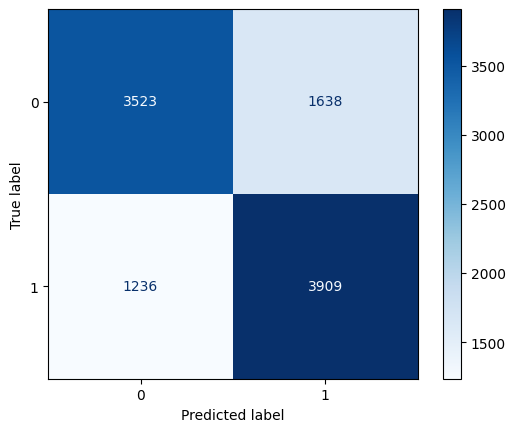

In [161]:
# Support Vector Machine
m6 = 'Support Vector Machine'
svm = SVC(probability=True)
model_svm = svm.fit(train_x,train_y)
svm_predicted = svm.predict(test_x)

# Evaluation: Confusion matrix#
###############################
svm_acc_score = accuracy_score(test_y, svm_predicted)
svm_conf_matrix = confusion_matrix(test_y, svm_predicted)
svm_tpr = svm_conf_matrix[1][1] /(svm_conf_matrix[1][0] + svm_conf_matrix[1][1])
svm_f1 = f1_score(test_y, svm_predicted)

print(f"The accuracy score of {m6} is: {round(svm_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m6} = {round(svm_tpr*100,2)} %' ) 
print(f"The f1 score for {m6} is {round(svm_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, svm_predicted))
ConfusionMatrixDisplay.from_estimator(svm, test_x, test_y, cmap = 'Blues')
plt.show()

#### Grid Search for optimum parameters for Support Vector Machine

In [158]:
#grid search for optimum parameters
Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
param_grid = {'C': Cs,
              'gamma' : gammas,
              'kernel': kernels}
svm_clf = RandomizedSearchCV(estimator=svm,
                               param_distributions=param_grid,
                               n_iter=100,
                               cv=3, 
                               verbose=2, 
                               random_state=0, 
                               n_jobs=-1,
                               return_train_score=True)


# train the model
svm_clf.fit(train_x,train_y)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


RandomizedSearchCV(cv=3, estimator=SVC(probability=True), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=0, return_train_score=True, verbose=2)

In [159]:
svm_clf.best_params_ 


{'kernel': 'rbf', 'gamma': 1, 'C': 10}

#### 6.2 - Tuned Support Vector Machine

The accuracy score of Support Vector Machine is: 72.16 %
Sensitivity (True Positive Rate) of Support Vector Machine is: 75.2 %
The f1 score for Support Vector Machine is 72.95 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      5161
           1       0.71      0.75      0.73      5145

    accuracy                           0.72     10306
   macro avg       0.72      0.72      0.72     10306
weighted avg       0.72      0.72      0.72     10306



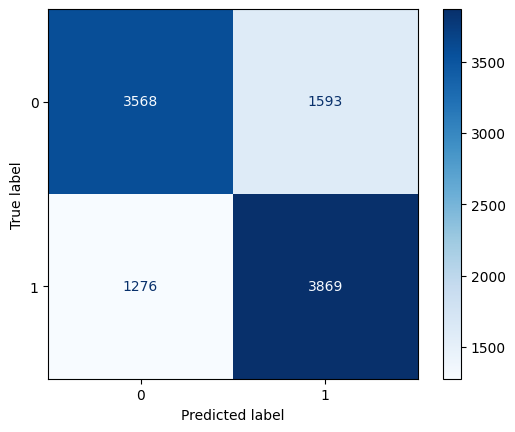

In [74]:
svm_tun =  SVC(kernel = 'rbf', gamma = 1, C = 10, probability=True)
model_svm_tun = svm_tun.fit(train_x,train_y)
svm_tun_predicted = svm_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
svm_tun_acc_score = accuracy_score(test_y, svm_tun_predicted)
svm_tun_conf_matrix = confusion_matrix(test_y, svm_tun_predicted)
svm_tun_tpr = svm_tun_conf_matrix[1][1] /(svm_tun_conf_matrix[1][0] + svm_tun_conf_matrix[1][1])
svm_tun_f1 = f1_score(test_y, svm_tun_predicted)

print(f"The accuracy score of {m6} is: {round(svm_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m6} is: {round(svm_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m6} is {round(svm_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, svm_tun_predicted))
ConfusionMatrixDisplay.from_estimator(svm_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

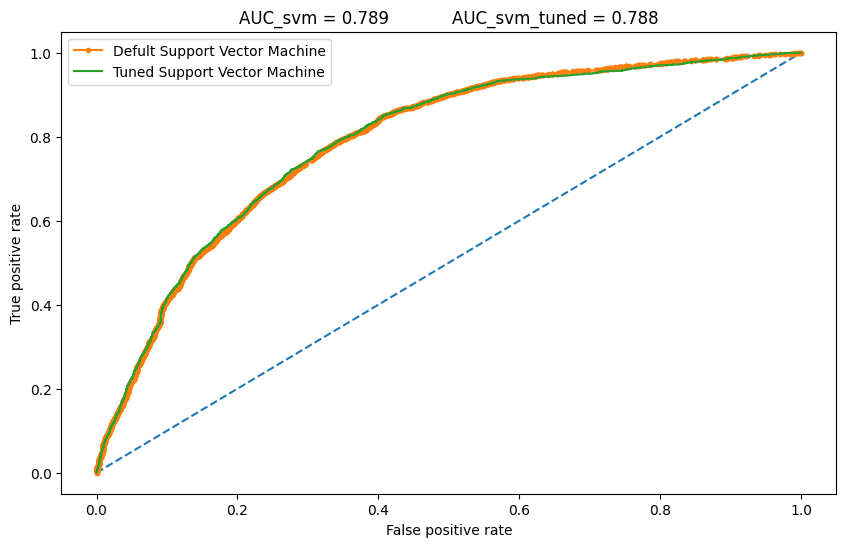

In [102]:
# ROC curve and AUC 
probs_svm = model_svm.predict_proba(test_x)
probs_svm_tun = model_svm_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_svm = probs_svm[:, 1]
probs_svm_tun = probs_svm_tun[:, 1]
# calculate AUC
auc_svm = roc_auc_score(test_y, probs_svm)
auc_svm_tun = roc_auc_score(test_y, probs_svm_tun)
# calculate roc curve
fpr_svm, tpr_svm,thresholds_svm = roc_curve(test_y, probs_svm)
fpr_svm_tun, tpr_svm_tun, thresholds_svm_tun = roc_curve(test_y, probs_svm_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_svm, tpr_svm, marker='.', label="Defult Support Vector Machine")
plt.plot(fpr_svm_tun, tpr_svm_tun, label="Tuned Support Vector Machine")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_svm = {round(auc_svm,3)}            AUC_svm_tuned = {round(auc_svm_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

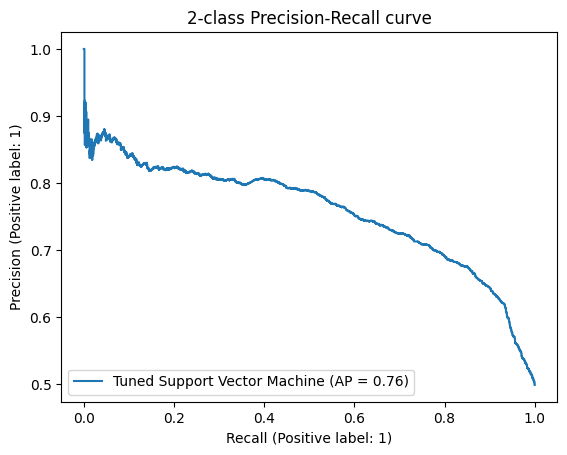

In [162]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_svm_tun, name="Tuned Support Vector Machine")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data¶

The accuracy score of Support Vector Machine is: 53.1 %
Sensitivity (True Positive Rate) of Support Vector Machine is: 47.83 %
The f1 score for Support Vector Machine is 4.48 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.98      0.53      0.69       977
           1       0.02      0.48      0.04        23

    accuracy                           0.53      1000
   macro avg       0.50      0.51      0.37      1000
weighted avg       0.96      0.53      0.67      1000



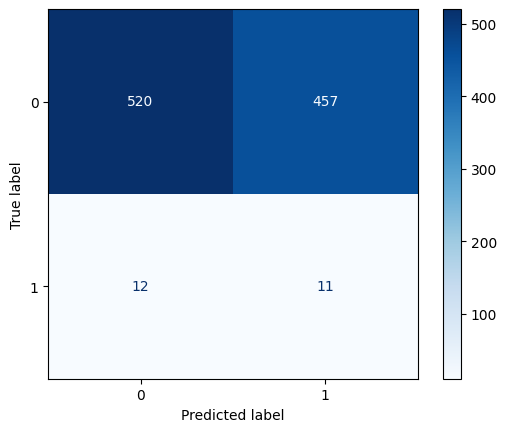

In [162]:
svm_tun =  SVC(kernel = 'rbf', gamma = 1, C = 10, probability=True)
model_svm_tun = svm_tun.fit(train_x,train_y)
svm_tun_predict_Bru = svm_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
svm_tun_acc_score_Bru = accuracy_score(Bru_y, svm_tun_predict_Bru)
svm_tun_conf_matrix_Bru = confusion_matrix(Bru_y, svm_tun_predict_Bru)
svm_tun_tpr_Bru = svm_tun_conf_matrix_Bru[1][1] /(svm_tun_conf_matrix_Bru[1][0] + svm_tun_conf_matrix_Bru[1][1])
svm_tun_f1_Bru = f1_score(Bru_y, svm_tun_predict_Bru)

print(f"The accuracy score of {m6} is: {round(svm_tun_acc_score_Bru*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m6} is: {round(svm_tun_tpr_Bru*100,2)} %' ) 
print(f"The f1 score for {m6} is {round(svm_tun_f1_Bru*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, svm_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(svm_tun, Bru_X, Bru_y, cmap = 'Blues')
plt.show()

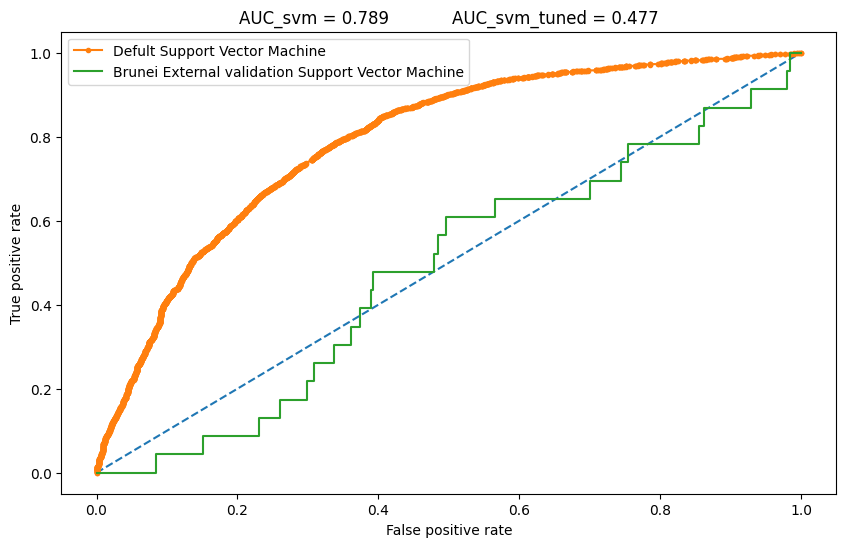

In [163]:
# ROC curve and AUC 
probs_svm = model_svm.predict_proba(test_x)
probs_svm_Bru = model_svm_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_svm = probs_svm[:, 1]
probs_svm_Bru = probs_svm_Bru[:, 1]
# calculate AUC
auc_svm = roc_auc_score(test_y, probs_svm)
auc_svm_Bru = roc_auc_score(Bru_y, probs_svm_Bru)
# calculate roc curve
fpr_svm, tpr_svm,thresholds_svm = roc_curve(test_y, probs_svm)
fpr_svm_Bru, tpr_svm_Bru, thresholds_svm_Bru = roc_curve(Bru_y, probs_svm_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_svm, tpr_svm, marker='.', label="Defult Support Vector Machine")
plt.plot(fpr_svm_Bru, tpr_svm_Bru, label="Brunei External validation Support Vector Machine")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_svm = {round(auc_svm,3)}            AUC_svm_tuned = {round(auc_svm_Bru,3)}")
plt.legend()
plt.show();

---
### 7. Gaussian Naive Bayes

In [164]:
##Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=7)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [165]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

The accuracy score of Naive Bayes is: 69.31 %
Sensitivity (True Positive Rate) of Naive Bayes is: 63.68 %
The f1 score for Naive Bayes is: 67.27 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      5202
           1       0.71      0.64      0.67      5104

    accuracy                           0.69     10306
   macro avg       0.70      0.69      0.69     10306
weighted avg       0.69      0.69      0.69     10306



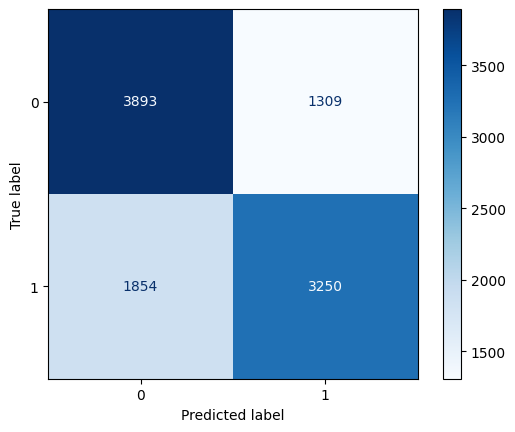

In [166]:
# Naive Bayes
m7 = 'Naive Bayes'
nb = GaussianNB()
model_nb = nb.fit(train_x,train_y)
nb_predicted = nb.predict(test_x)

# Evaluation: Confusion matrix#
###############################
nb_acc_score = accuracy_score(test_y, nb_predicted)
nb_conf_matrix = confusion_matrix(test_y, nb_predicted)
nb_tpr = nb_conf_matrix[1][1] /(nb_conf_matrix[1][0] + nb_conf_matrix[1][1])
nb_f1 = f1_score(test_y, nb_predicted)

print(f"The accuracy score of {m7} is: {round(nb_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m7} is: {round(nb_tpr*100,2)} %' ) 
print(f"The f1 score for {m7} is: {round(nb_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, nb_predicted))
ConfusionMatrixDisplay.from_estimator(nb, test_x, test_y, cmap = 'Blues')
plt.show()

#### Grid Search for optimum parameters for Gaussian Naive Bayes

In [167]:
#grid search for optimum parameters
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_clf = GridSearchCV(GaussianNB(), params_NB, scoring = 'f1',  cv=10, verbose=1, n_jobs=-1)

# train the model
nb_clf.fit(train_x,train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=1)

In [168]:
nb_clf.best_params_ 

{'var_smoothing': 4.328761281083053e-06}

#### 7.2 - Tuned Gaussian Naive Bayes

The accuracy score of Naive Bayes is: 69.31 %
Sensitivity (True Positive Rate) of Naive Bayes is: 75.8 %
The f1 score for Naive Bayes is 67.27 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      5202
           1       0.71      0.64      0.67      5104

    accuracy                           0.69     10306
   macro avg       0.70      0.69      0.69     10306
weighted avg       0.69      0.69      0.69     10306



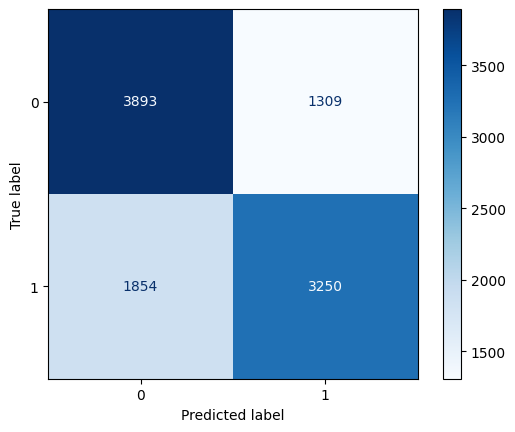

In [78]:
nb_tun =  GaussianNB(var_smoothing =  4.328761281083053e-06)
model_nb_tun = nb_tun.fit(train_x,train_y)
nb_tun_predicted = nb_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
nb_tun_acc_score = accuracy_score(test_y, nb_tun_predicted)
nb_tun_conf_matrix = confusion_matrix(test_y, nb_tun_predicted)
nb_tun_tpr = svm_tun_conf_matrix[1][1] /(nb_tun_conf_matrix[1][0] + nb_tun_conf_matrix[1][1])
nb_tun_f1 = f1_score(test_y, nb_tun_predicted)

print(f"The accuracy score of {m7} is: {round(nb_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m7} is: {round(nb_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m7} is {round(nb_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, nb_tun_predicted))
ConfusionMatrixDisplay.from_estimator(nb_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

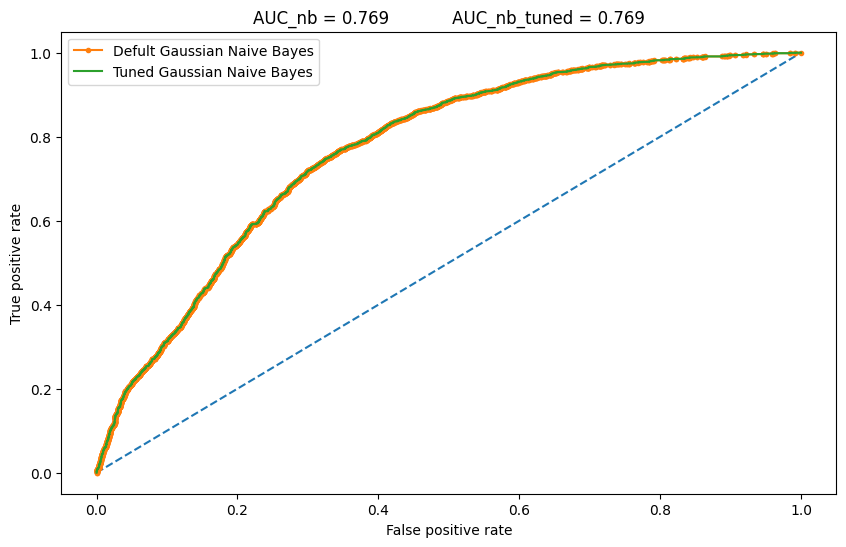

In [105]:
# ROC curve and AUC 
probs_nb = model_nb.predict_proba(test_x)
probs_nb_tun = model_nb_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_nb = probs_nb[:, 1]
probs_nb_tun = probs_nb_tun[:, 1]
# calculate AUC
auc_nb = roc_auc_score(test_y, probs_nb)
auc_nb_tun = roc_auc_score(test_y, probs_nb_tun)
# calculate roc curve
fpr_nb, tpr_nb,thresholds_nb = roc_curve(test_y, probs_nb)
fpr_nb_tun, tpr_nb_tun, thresholds_nb_tun = roc_curve(test_y, probs_nb_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_nb, tpr_nb, marker='.', label="Defult Gaussian Naive Bayes")
plt.plot(fpr_nb_tun, tpr_nb_tun, label="Tuned Gaussian Naive Bayes")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_nb = {round(auc_nb,3)}            AUC_nb_tuned = {round(auc_nb_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

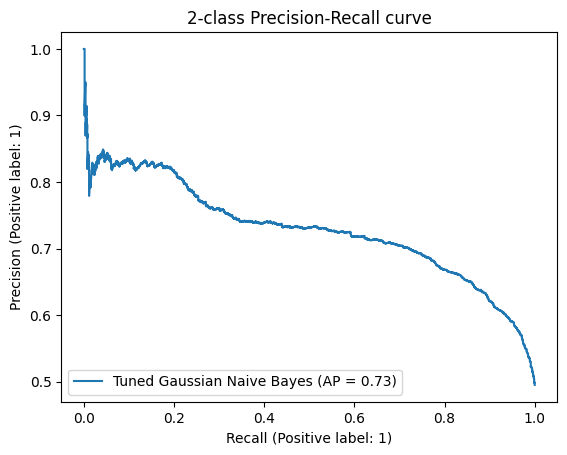

In [171]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_nb_tun, name="Tuned Gaussian Naive Bayes")
_ = display.ax_.set_title("2-class Precision-Recall curve")

### External validation with Brunei data¶

The accuracy score of Naive Bayes is: 57.9 %
Sensitivity (True Positive Rate) of Naive Bayes is: 47.83 %
The f1 score for Naive Bayes is 4.97 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.98      0.58      0.73       977
           1       0.03      0.48      0.05        23

    accuracy                           0.58      1000
   macro avg       0.50      0.53      0.39      1000
weighted avg       0.96      0.58      0.71      1000



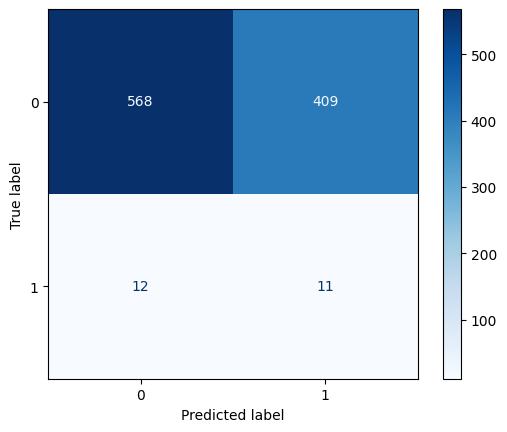

In [167]:
nb_tun =  GaussianNB(var_smoothing =   4.328761281083053e-06)
model_nb_tun = nb_tun.fit(train_x,train_y)
nb_tun_predict_Bru = nb_tun.predict(Bru_X)

# Evaluation: Confusion matrix#
###############################
nb_tun_acc_score_Bru = accuracy_score(Bru_y, nb_tun_predict_Bru)
nb_tun_conf_matrix_Bru = confusion_matrix(Bru_y, nb_tun_predict_Bru)
nb_tun_tpr_Bru = svm_tun_conf_matrix_Bru[1][1] /(nb_tun_conf_matrix_Bru[1][0] + nb_tun_conf_matrix_Bru[1][1])
nb_tun_f1_Bru = f1_score(Bru_y, nb_tun_predict_Bru)

print(f"The accuracy score of {m7} is: {round(nb_tun_acc_score_Bru*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m7} is: {round(nb_tun_tpr_Bru*100,2)} %' ) 
print(f"The f1 score for {m7} is {round(nb_tun_f1_Bru*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(Bru_y, nb_tun_predict_Bru))
ConfusionMatrixDisplay.from_estimator(nb_tun, Bru_X, Bru_y, cmap = 'Blues')
plt.show()

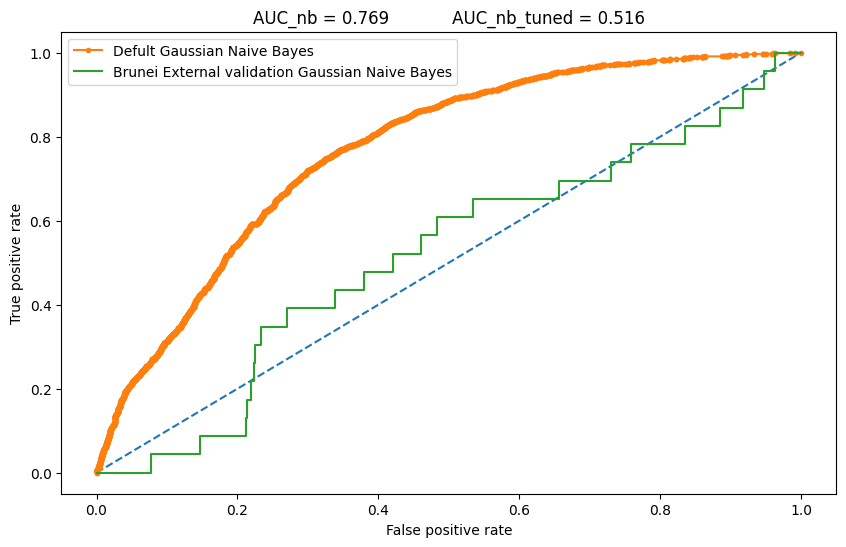

In [168]:
# ROC curve and AUC 
probs_nb = model_nb.predict_proba(test_x)
probs_nb_Bru = model_nb_tun.predict_proba(Bru_X)

# keep probabilities for the positive outcome only
probs_nb = probs_nb[:, 1]
probs_nb_Bru = probs_nb_Bru[:, 1]
# calculate AUC
auc_nb = roc_auc_score(test_y, probs_nb)
auc_nb_Bru = roc_auc_score(Bru_y, probs_nb_Bru)
# calculate roc curve
fpr_nb, tpr_nb,thresholds_nb = roc_curve(test_y, probs_nb)
fpr_nb_Bru, tpr_nb_Bru, thresholds_nb_Bru = roc_curve(Bru_y, probs_nb_Bru)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_nb, tpr_nb, marker='.', label="Defult Gaussian Naive Bayes")
plt.plot(fpr_nb_Bru, tpr_nb_Bru, label="Brunei External validation Gaussian Naive Bayes")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_nb = {round(auc_nb,3)}            AUC_nb_tuned = {round(auc_nb_Bru,3)}")
plt.legend()
plt.show();

---
## ML models Ensembling

In order to increase the accuracy of the model we will use stacking technique of ensembling to create an ensembled model.

Fitting 7 classifiers...
Fitting classifier1: logisticregression (1/7)
LogisticRegression(C=0.01, class_weight='balanced')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier2: kneighborsclassifier (2/7)
KNeighborsClassifier(n_neighbors=1)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.3s finished


Fitting classifier3: decisiontreeclassifier (3/7)
DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='auto',
                       random_state=0)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier4: randomforestclassifier (4/7)
RandomForestClassifier(bootstrap=False, max_depth=24, max_features='auto',
                       n_estimators=400, random_state=0)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier5: gradientboostingclassifier (5/7)
GradientBoostingClassifier(max_depth=21, max_features='sqrt', n_estimators=200,
                           random_state=0)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier6: svc (6/7)
SVC(C=10, gamma=1, probability=True)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  5.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier7: gaussiannb (7/7)
GaussianNB(var_smoothing=4.328761281083053e-06)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished


#############################################################################################
The accuracy score of Stacking CV Classifier is: 97.17 %
Sensitivity (True Positive Rate) of Stacking CV Classifier is: 99.35 %
The f1 score for Stacking CV Classifier is: 97.2 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5202
           1       0.95      0.99      0.97      5104

    accuracy                           0.97     10306
   macro avg       0.97      0.97      0.97     10306
weighted avg       0.97      0.97      0.97     10306



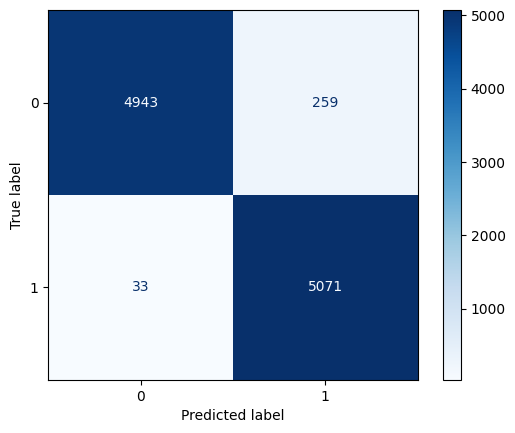

In [80]:
# Stacking CV Classifier
m_ensemble = 'Stacking CV Classifier'
ensemble =  StackingCVClassifier(classifiers=[lr_tun, knn_tun, dt_tun, rf_tun, gb_tun, svm_tun, nb_tun], meta_classifier= rf,
                                verbose=2,
                                n_jobs=-1)
model_ensemble = ensemble.fit(train_x, train_y)
ensemble_predict = ensemble.predict(test_x)

# Evaluation: Confusion matrix
###############################
ensemble_acc = accuracy_score(test_y, ensemble_predict)
cm_ensemble = confusion_matrix(test_y, ensemble_predict) 
tpr_ensemble = cm_ensemble[1][1] /(cm_ensemble[1][0] + cm_ensemble[1][1])
ensemble_f1 = f1_score(test_y, ensemble_predict)
print('#############################################################################################')
print(f'The accuracy score of {m_ensemble} is: {round(ensemble_acc*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m_ensemble} is: {round(tpr_ensemble*100,2)} %' ) 
print(f'The f1 score for {m_ensemble} is: {round(ensemble_f1*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, ensemble_predict ))

ConfusionMatrixDisplay.from_estimator(ensemble, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

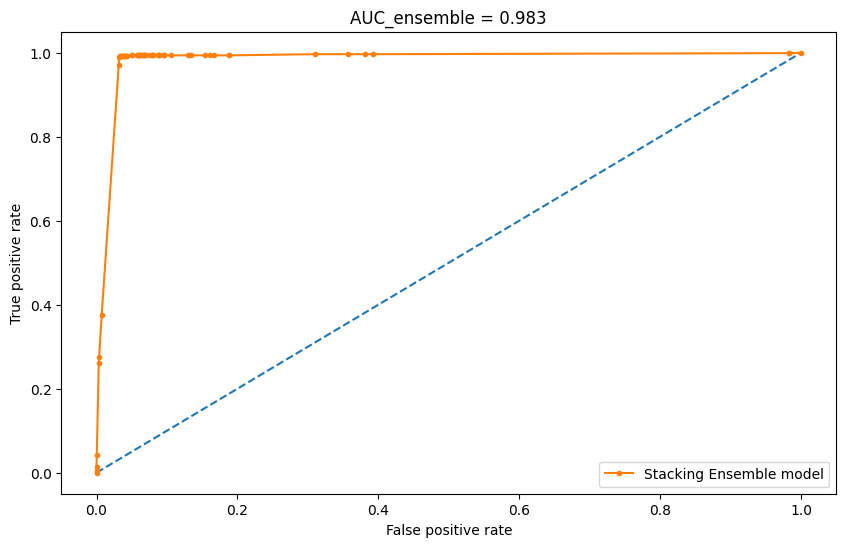

In [81]:
# ROC curve and AUC 
probs_ensemble = model_ensemble.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_ensemble = probs_ensemble[:, 1]
# calculate AUC
auc_ensemble = roc_auc_score(test_y, probs_ensemble)

# calculate roc curve
fpr_ensemble, tpr_ensemble,thresholds_ensemble = roc_curve(test_y, probs_ensemble)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_ensemble, tpr_ensemble, marker='.', label="Stacking Ensemble model")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_ensemble = {round(auc_ensemble,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

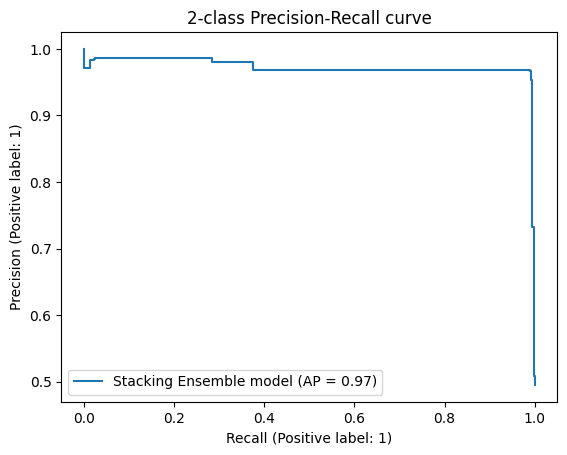

In [174]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_ensemble, name="Stacking Ensemble model")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---
## Artificial Neural Network

We'll define an artificial neural network with one hidden layer using keras. Since this is a binary classification problem, we will use a binary crossentropy loss during our training phase and a sigmoid activation function in the network's final layer.

In [20]:
#Train-test-split for non-scaled dataset

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (41220, 6)
test_x shape is  (10306, 6)
train_y shape is  (41220,)
test_y shape is  (10306,)


In [21]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x =  pd.DataFrame(scaler.fit_transform(train_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])
test_x = pd.DataFrame(scaler.transform(test_x), columns= ['Age','Gender','SysBP','Diabetes','Smoking', 'Tot_Chol_mmol/l'])

In [22]:
train_x.head(10)

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l
0,0.287834,1.0,0.264706,0.0,0.0,0.404762
1,0.480712,1.0,0.475152,0.0,0.0,0.325397
2,0.376855,0.0,0.371197,1.0,0.0,0.349206
3,0.480712,0.0,0.239351,0.0,1.0,0.119048
4,0.807122,1.0,0.198783,0.0,1.0,0.182540
5,1.000000,0.0,0.320487,0.0,0.0,0.388889
6,0.480712,1.0,0.245943,0.0,0.0,0.373016
7,0.747774,1.0,0.225659,0.0,1.0,0.380952
8,0.495549,1.0,0.272312,0.0,1.0,0.388889
9,0.747774,1.0,0.245943,0.0,0.0,0.253968


In [23]:
# define a new keras Neural Network model for binary classification
def create_NN_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
    return model

NN_model = create_NN_model()

print(NN_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# fit the binary model on the training data
model_NN = NN_model.fit(train_x, train_y, epochs=100, batch_size=10, verbose = 1, validation_data= (test_x,test_y))
model_NN

Epoch 1/100
4122/4122 [==============================] - 14s 3ms/step - loss: 0.5675 - accuracy: 0.7048 - val_loss: 0.5629 - val_accuracy: 0.7050
Epoch 2/100
4122/4122 [==============================] - 12s 3ms/step - loss: 0.5628 - accuracy: 0.7103 - val_loss: 0.5613 - val_accuracy: 0.7079
Epoch 3/100
4122/4122 [==============================] - 12s 3ms/step - loss: 0.5619 - accuracy: 0.7098 - val_loss: 0.5571 - val_accuracy: 0.7122
Epoch 4/100
4122/4122 [==============================] - 12s 3ms/step - loss: 0.5608 - accuracy: 0.7103 - val_loss: 0.5608 - val_accuracy: 0.7031
Epoch 5/100
4122/4122 [==============================] - 11s 3ms/step - loss: 0.5582 - accuracy: 0.7147 - val_loss: 0.5648 - val_accuracy: 0.7124
Epoch 6/100
4122/4122 [==============================] - 12s 3ms/step - loss: 0.5566 - accuracy: 0.7156 - val_loss: 0.5623 - val_accuracy: 0.7078
Epoch 7/100
4122/4122 [==============================] - 12s 3ms/step - loss: 0.5550 - accuracy: 0.7115 - val_loss: 0.5531 -

In [25]:
m_NN = 'Artificial Neural Network'
model_NN_predict = np.round(NN_model.predict(test_x)).astype(int)
# Evaluation: Confusion matrix
###############################
NN_acc = accuracy_score(test_y, model_NN_predict)
cm_NN = confusion_matrix(test_y, model_NN_predict) 
tpr_NN = cm_NN[1][1] /(cm_NN[1][0] + cm_NN[1][1])
NN_f1 = f1_score(test_y, model_NN_predict)
print(f'The accuracy score of {m_NN} is: {round(NN_acc*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m_NN} is: {round(tpr_NN*100,2)} %' ) 
print(f'The f1 score for {m_NN} is: {round(NN_f1*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, model_NN_predict ))

323/323 [==============================] - 1s 2ms/step
The accuracy score of Artificial Neural Network is: 71.22 %
Sensitivity (True Positive Rate) of Artificial Neural Network is: 73.57 %
The f1 score for Artificial Neural Network is: 71.74 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      5190
           1       0.70      0.74      0.72      5116

    accuracy                           0.71     10306
   macro avg       0.71      0.71      0.71     10306
weighted avg       0.71      0.71      0.71     10306



### Grid search for optimum parameters for ANN

#### Batch size and epochs tuning

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_NN_model, verbose=0)

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_NN_model, verbose=0)
#grid search for optimum parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [100, 200, 300]

param_grid = {'batch_size': batch_size,
              'epochs' : epochs}
NN_grid = GridSearchCV(estimator=model,param_grid= param_grid, cv=3, verbose=2, n_jobs = -1)

# train the model
NN_grid.fit(train_x,train_y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025DC6683730>,
             n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [100, 200, 300]},
             verbose=2)

In [28]:
NN_grid.best_params_ 

{'batch_size': 80, 'epochs': 200}

#### **ANN optimizer tunning**

In [30]:
# define a new keras Neural Network model for binary classification
def create_NN_model_2(optimizer= 'adam'):
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

model_2 = KerasClassifier(build_fn=create_NN_model_2, epochs=200, batch_size=80, verbose=0)

optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta', 'Nadam']
param_grid_2 = {'optimizer': optimizer}
NN_grid_2 = GridSearchCV(estimator= model_2, param_grid= param_grid_2, cv=3, verbose=2, n_jobs = -1)

# train the model
NN_grid_2.fit(train_x,train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025DC6683AF0>,
             n_jobs=-1,
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adam', 'Adagrad',
                                       'Adadelta', 'Nadam']},
             verbose=2)

In [31]:
NN_grid_2.best_params_ 

{'optimizer': 'Adam'}

#### **Tunning the activation function**

In [32]:
# define a new keras Neural Network model for binary classification
def create_NN_model_3(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation=activation))
    model.add(Dense(3, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
    return model

model_3 = KerasClassifier(build_fn=create_NN_model_3, epochs=200, batch_size=80, verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid_3 = {'activation': activation}
NN_grid_3 = GridSearchCV(estimator= model_3, param_grid= param_grid_3, cv=3, verbose=2, n_jobs = -1)

# train the model
NN_grid_3.fit(train_x,train_y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025DC77CF1F0>,
             n_jobs=-1,
             param_grid={'activation': ['softmax', 'softplus', 'softsign',
                                        'relu', 'tanh', 'sigmoid',
                                        'hard_sigmoid', 'linear']},
             verbose=2)

In [33]:
NN_grid_3.best_params_ 

{'activation': 'tanh'}

#### **Tunning drop out Regularization layer**

In [34]:
# importing Dropout and maxnorm
from keras.layers import Dropout
from keras.constraints import maxnorm

In [43]:

# define a new keras Neural Network model for binary classification
def create_NN_model_4(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='tanh',
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dense(3, kernel_initializer='normal', activation='tanh', 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer= 'Adam', metrics=['accuracy'])
    return model

model_4 = KerasClassifier(build_fn=create_NN_model_4, epochs=200, batch_size=80, verbose=0)

weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid_4 = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
NN_grid_4 = GridSearchCV(estimator= model_4, param_grid= param_grid_4, cv=3, verbose=2, n_jobs = -1)

# train the model
NN_grid_4.fit(train_x,train_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025DE4488F10>,
             n_jobs=-1,
             param_grid={'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                          0.7, 0.8, 0.9],
                         'weight_constraint': [1, 2, 3, 4, 5]},
             verbose=2)

In [44]:
NN_grid_4.best_params_ 

{'dropout_rate': 0.2, 'weight_constraint': 4}

#### **Tuning  Number of Neurons**

In [45]:
# define a new keras Neural Network model for binary classification
def create_NN_model_5(neurons_L1=1, neurons_L2=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons_L1, input_dim=6, kernel_initializer='normal', activation='tanh',
                    kernel_constraint=maxnorm(4)))
    model.add(Dense(neurons_L2, kernel_initializer='normal', activation='tanh', 
                    kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
    return model

model_5 = KerasClassifier(build_fn=create_NN_model_5, epochs=200, batch_size=80, verbose=0)

neurons_L1 = range(1,7,1)
neurons_L2 = range(1,12,1)
param_grid_5 = dict(neurons_L1=neurons_L1, neurons_L2=neurons_L2)
NN_grid_5 = GridSearchCV(estimator= model_5, param_grid= param_grid_5, cv=3, verbose=2, n_jobs = -1)

# train the model
NN_grid_5.fit(train_x,train_y)

Fitting 3 folds for each of 66 candidates, totalling 198 fits


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025DD47415A0>,
             n_jobs=-1,
             param_grid={'neurons_L1': range(1, 7), 'neurons_L2': range(1, 12)},
             verbose=2)

In [46]:
NN_grid_5.best_params_ 

{'neurons_L1': 4, 'neurons_L2': 7}

#### **Tuning learning rate**

In [47]:
# define a new keras Neural Network model for binary classification
def create_NN_model_6(learn_rate=0.001):
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=6, kernel_initializer='normal', activation='tanh',
                    kernel_constraint=maxnorm(4)))
    model.add(Dense(7, kernel_initializer='normal', activation='tanh', 
                    kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    optimizer = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

model_6 = KerasClassifier(build_fn=create_NN_model_6, epochs=200, batch_size=80, verbose=0)

learn_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid_6 = dict(learn_rate=learn_rate)
NN_grid_6 = GridSearchCV(estimator= model_6, param_grid= param_grid_6, cv=3, verbose=2, n_jobs = -1)

# train the model
NN_grid_6.fit(train_x,train_y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000025DD4743970>,
             n_jobs=-1,
             param_grid={'learn_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
             verbose=2)

In [48]:
NN_grid_6.best_params_ 

{'learn_rate': 0.01}

### Tuned Artificial Neural Netwrk

In [49]:
# importing Dropout and maxnorm
from keras.layers import Dropout
from keras.constraints import maxnorm
# define a new keras Neural Network model for binary classification
def create_NN_model_tun():
    model = Sequential()
    model.add(Dense(4, input_dim=6, kernel_initializer='normal', activation='tanh',
                    kernel_constraint=maxnorm(4)))
    model.add(Dense(7, kernel_initializer='normal', activation='tanh', 
                    kernel_constraint=maxnorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    optimizer = Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

NN_model_tun = create_NN_model_tun()

print(NN_model_tun.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 4)                 28        
                                                                 
 dense_34 (Dense)            (None, 7)                 35        
                                                                 
 dropout_7 (Dropout)         (None, 7)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                 8         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
# fit the binary model on the training data
model_NN_tun = NN_model_tun.fit(train_x, train_y, epochs=200, batch_size=80, 
                                verbose = 1, validation_data= (test_x,test_y))
model_NN_tun

Epoch 1/200
516/516 [==============================] - 3s 4ms/step - loss: 0.5767 - accuracy: 0.6993 - val_loss: 0.5630 - val_accuracy: 0.7091
Epoch 2/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5679 - accuracy: 0.7093 - val_loss: 0.5623 - val_accuracy: 0.7066
Epoch 3/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5678 - accuracy: 0.7091 - val_loss: 0.5612 - val_accuracy: 0.7101
Epoch 4/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5653 - accuracy: 0.7093 - val_loss: 0.5654 - val_accuracy: 0.7092
Epoch 5/200
516/516 [==============================] - 2s 4ms/step - loss: 0.5638 - accuracy: 0.7102 - val_loss: 0.5600 - val_accuracy: 0.7081
Epoch 6/200
516/516 [==============================] - 2s 4ms/step - loss: 0.5647 - accuracy: 0.7101 - val_loss: 0.5588 - val_accuracy: 0.7115
Epoch 7/200
516/516 [==============================] - 2s 3ms/step - loss: 0.5627 - accuracy: 0.7115 - val_loss: 0.5629 - val_accuracy: 0.7069

In [51]:
m_NN_tun = 'Tuned Artificial Neural Network'
model_NN_predict_tun = np.round(NN_model_tun.predict(test_x)).astype(int)
# Evaluation: Confusion matrix
###############################
NN_acc_tun = accuracy_score(test_y, model_NN_predict_tun)
cm_NN_tun = confusion_matrix(test_y, model_NN_predict_tun) 
tpr_NN_tun = cm_NN_tun[1][1] /(cm_NN_tun[1][0] + cm_NN_tun[1][1])
NN_f1_tun = f1_score(test_y, model_NN_predict_tun)
print(f'The accuracy score of {m_NN_tun} is: {round(NN_acc_tun*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m_NN_tun} is: {round(tpr_NN_tun*100,2)} %' ) 
print(f'The f1 score for {m_NN_tun} is: {round(NN_f1_tun*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, model_NN_predict_tun ))

323/323 [==============================] - 1s 2ms/step
The accuracy score of Tuned Artificial Neural Network is: 71.34 %
Sensitivity (True Positive Rate) of Tuned Artificial Neural Network is: 77.68 %
The f1 score for Tuned Artificial Neural Network is: 72.9 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      5190
           1       0.69      0.78      0.73      5116

    accuracy                           0.71     10306
   macro avg       0.72      0.71      0.71     10306
weighted avg       0.72      0.71      0.71     10306



#### Drawing ROC curve

323/323 [==============================] - 1s 2ms/step


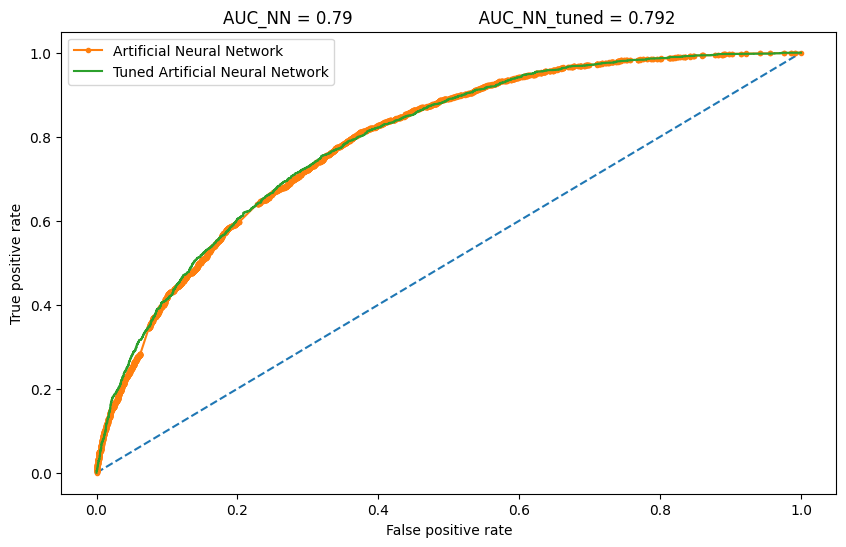

In [52]:
# ROC curve and AUC 
probs_NN = NN_model.predict(test_x).ravel()
probs_NN_tun = NN_model_tun.predict(test_x).ravel()

auc_NN = roc_auc_score(test_y, probs_NN)
auc_NN_tun = roc_auc_score(test_y, probs_NN_tun)

# calculate roc curve
fpr_NN, tpr_NN,thresholds_NN = roc_curve(test_y, probs_NN)
fpr_NN_tun, tpr_NN_tun,thresholds_NN_tun = roc_curve(test_y, probs_NN_tun)

# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_NN, tpr_NN, marker='.', label="Artificial Neural Network")
plt.plot(fpr_NN_tun, tpr_NN_tun, label="Tuned Artificial Neural Network")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_NN = {round(auc_NN,3)}                        AUC_NN_tuned = {round(auc_NN_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

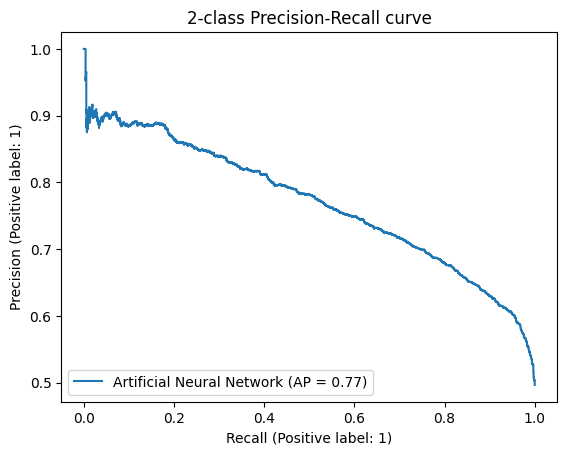

In [53]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_NN_tun, name="Artificial Neural Network")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---
## Model Evaluation

In [106]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                                   'K-Nearest Neighbour',
                                   'Decision Tree',
                                   'Random Forest',
                                   'Gradient Boosting Classifier',
                                   'Support Vector Machine',
                                  'Gaussian Naive Bayes',
                                  'Staking ML Ensemble',
                                  'Artificial Neural Network'], 
                         'Accuracy %': [round(lr_tun_acc_score*100,2),
                                        round(knn_tun_acc_score*100,2),
                                        round(dt_tun_acc_score*100,2),
                                        round(rf_tun_acc_score*100,2),
                                        round(gb_tun_acc_score*100,2),
                                        round(svm_tun_acc_score*100,2),
                                        round(nb_tun_acc_score*100,2),
                                        round(ensemble_acc*100,2),
                                        round(NN_acc*100,2)],
                        'F1 score %': [round(lr_tun_f1*100,2),
                                        round(knn_tun_f1*100,2),
                                        round(dt_tun_f1*100,2),
                                        round(rf_tun_f1*100,2),
                                        round(gb_tun_f1*100,2),
                                        round(svm_tun_f1*100,2),
                                        round(nb_tun_f1*100,2),
                                        round(ensemble_f1*100,2),
                                        round(NN_f1*100,2)],
                        'AUC %': [round(auc_lr*100,2),
                                        round(auc_knn_tun*100,2),
                                        round(auc_dt_tun*100,2),
                                        round(auc_rf_tun*100,2),
                                        round(auc_gb_tun*100,2),
                                        round(auc_svm_tun*100,2),
                                        round(auc_nb_tun*100,2),
                                        round(auc_ensemble*100,2),
                                        round(auc_NN*100,2)]})
model_ev

,Model,Accuracy %,F1 score %,AUC %
0,Logistic Regression,71.37,71.81,78.41
1,K-Nearest Neighbour,93.64,94.03,93.62
2,Decision Tree,93.41,93.66,93.64
3,Random Forest,96.30,96.40,99.69
4,Gradient Boosting Classifier,96.80,96.87,99.64
5,Support Vector Machine,72.16,72.95,78.83
6,Gaussian Naive Bayes,69.31,67.27,76.87
7,Staking ML Ensemble,97.17,97.20,98.33
8,Artificial Neural Network,71.22,71.74,79.01


### Comparison of Accuracy of ML models

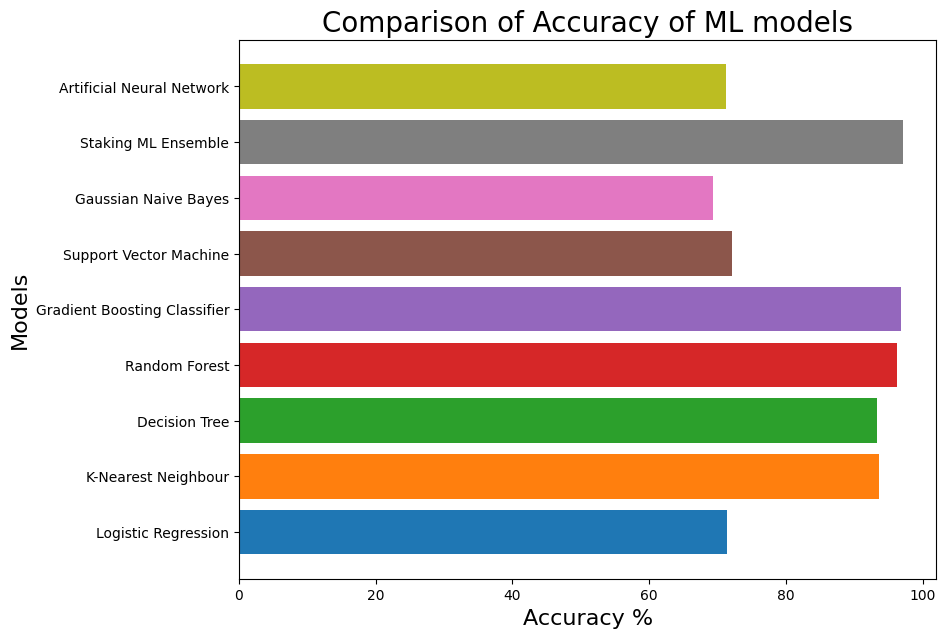

In [107]:
# Barplot Representing Accuracy of different models
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)

plt.figure(figsize=(9,7), facecolor='w')
plt.title("Comparison of Accuracy of ML models", fontsize=20)
plt.xlabel("Accuracy %", fontsize=16)
plt.ylabel("Models", fontsize=16)
plt.barh(model_ev['Model'],model_ev['Accuracy %'], color = colors)
plt.show()

### Drawing comparison of ROC curves

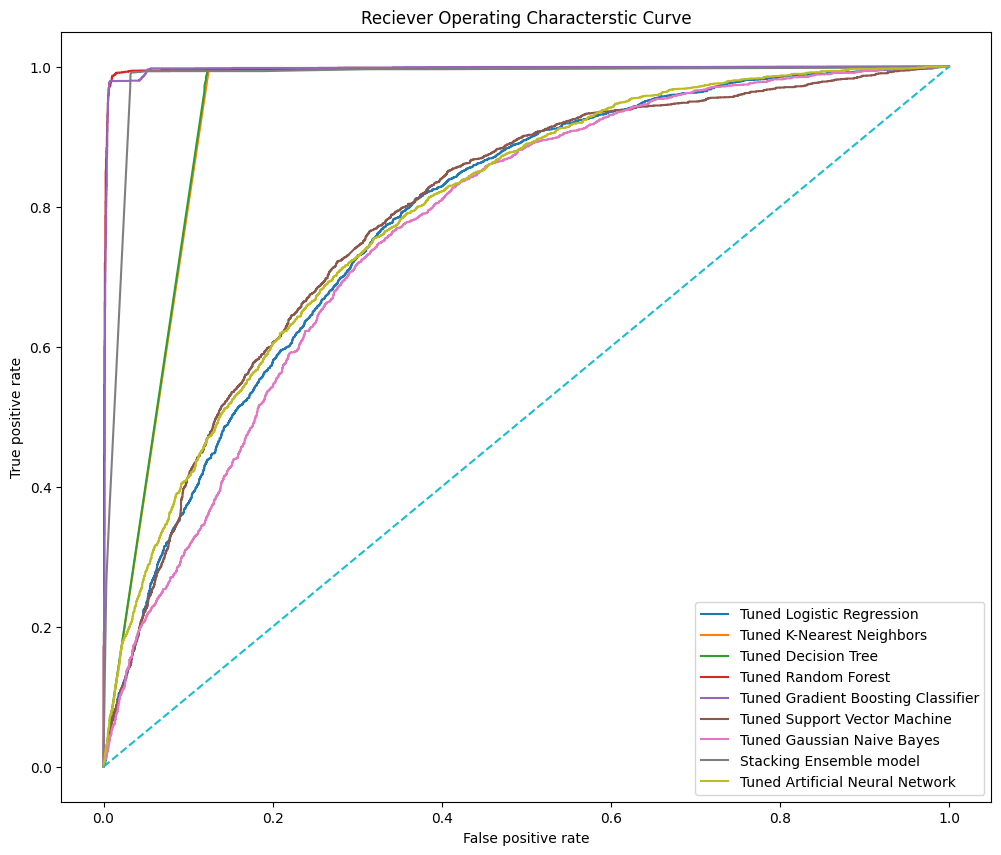

In [108]:
# plot curve

plt.figure(figsize=(12,10), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(fpr_lr_tun, tpr_lr_tun, label="Tuned Logistic Regression")
plt.plot(fpr_knn_tun, tpr_knn_tun, label="Tuned K-Nearest Neighbors")
plt.plot(fpr_dt_tun, tpr_dt_tun, label="Tuned Decision Tree")
plt.plot(fpr_rf_tun, tpr_rf_tun, label="Tuned Random Forest")
plt.plot(fpr_gb_tun, tpr_gb_tun, label="Tuned Gradient Boosting Classifier")
plt.plot(fpr_svm_tun, tpr_svm_tun, label="Tuned Support Vector Machine")
plt.plot(fpr_nb_tun, tpr_nb_tun, label="Tuned Gaussian Naive Bayes")
plt.plot(fpr_ensemble, tpr_ensemble, label="Stacking Ensemble model")
plt.plot(fpr_NN_tun, tpr_NN_tun, label="Tuned Artificial Neural Network")
plt.plot([0,1],ls='--')
#plt.plot([0,0],[1,0],c='.5')
#plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show();

---
## Model Explanation

### SHAP explanation of all predictions by ML Ensemble model

#### As the staking ML ensemble is of the highest performance accuracy among all machine learning models, I will try to explain the prediction of ML ensemble model and depicts the impact of every feature on the final output prediction of CVD risk.

In [65]:
%conda install -c conda-forge shap


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: shap


In [112]:
import shap
shap.initjs()

100%|██████████| 100/100 [45:53<00:00, 27.54s/it]


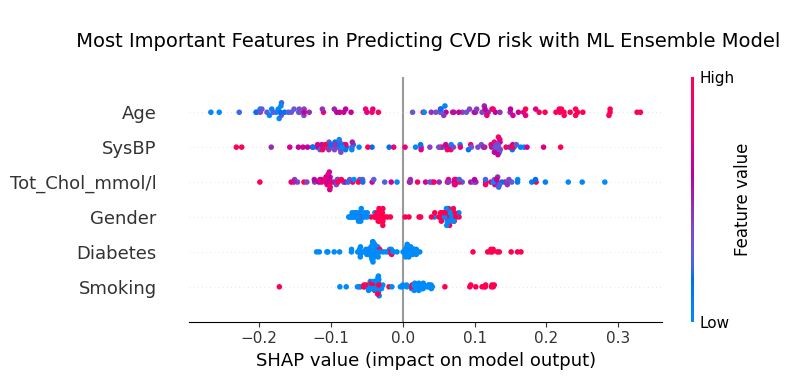

In [114]:
#Sampling from training dataset from calculating SHAP values
train_x100 = shap.utils.sample(train_x, 100)

# compute the SHAP values for the ensemble model
f = lambda x: model_ensemble.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, train_x100)
shap_values = explainer.shap_values(test_x.iloc[0:100,:], nsamples=100)

# Plotting
plt.title(label="\n Most Important Features in Predicting CVD risk with ML Ensemble Model\n", fontsize=14)
shap.summary_plot(shap_values, test_x.iloc[0:100,:])

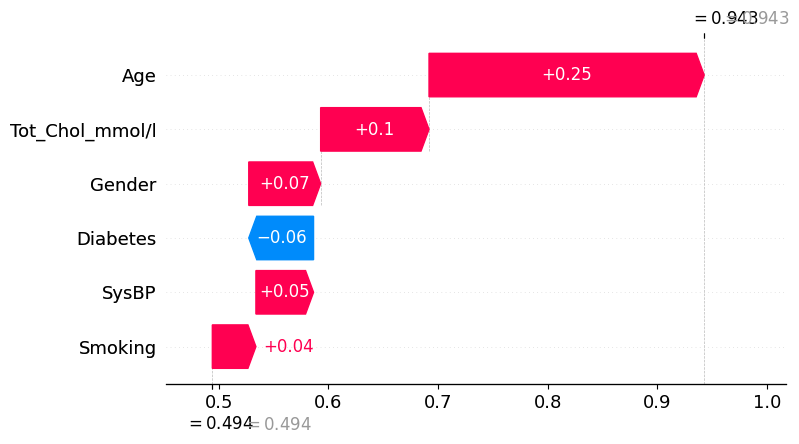

In [115]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], 
                                       feature_names = test_x.columns)

#### observation
- Age was the highest feature with positive impact on prediction of high CVD risk.
- Followed by, Total cholesterol, Gender, systolic blood pressure and Smoking which have also positive impact on prediction of high CVD risk.


### SHAP explanation of all predictions by Gradient Boosting

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 1000/1000 [14:16<00:00,  1.17it/s]


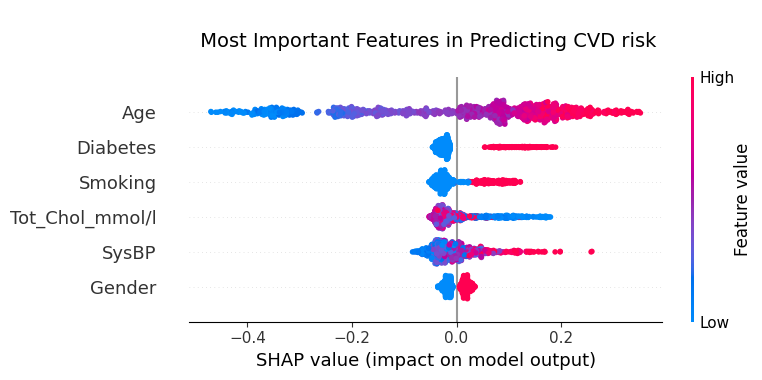

In [116]:
shap.initjs()

#Sampling from training dataset from calculating SHAP values
train_x1000 = shap.utils.sample(train_x, 1000)

# compute the SHAP values for the ensemble model
f = lambda x: model_gb.predict_proba(x)[:,1]
explainer = shap.KernelExplainer(f, train_x1000)
shap_values = explainer.shap_values(test_x.iloc[0:1000,:], nsamples=1000)

# Plotting
plt.title(label="\n Most Important Features in Predicting CVD risk\n", fontsize=14)
shap.summary_plot(shap_values, test_x.iloc[0:1000,:])
#shap.plots.waterfall(shap_values, max_display=14)

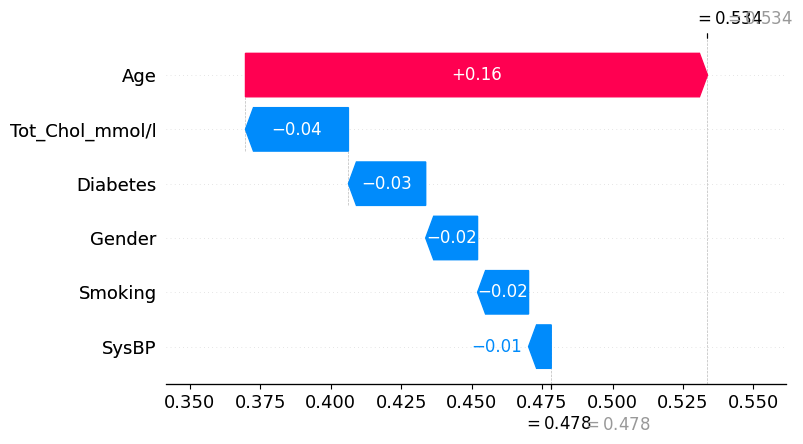

In [117]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], 
                                       feature_names = test_x.columns)

---
## Saving Models

### Saving ML ensemble model

In [124]:
import pickle

ensemble_lab_Brunei = 'ensemble_lab_Brunei.pkl'
pickle.dump(ensemble, open(ensemble_lab_Brunei, 'wb'))

In [125]:
gb_lab_Brunei = 'gb_lab_Brunei.pkl'
pickle.dump(gb_tun, open(gb_lab_Brunei, 'wb'))

In [126]:
rf_lab_Brunei = 'rf_lab_Brunei.pkl'
pickle.dump(rf_tun, open(rf_lab_Brunei, 'wb'))

In [127]:
dt_lab_Brunei = 'dt_office_Brunei.pkl'
pickle.dump(dt_tun, open(dt_lab_Brunei, 'wb'))

In [128]:
knn_lab_Brunei = 'knn_lab_Brunei.pkl'
pickle.dump(knn_tun, open(knn_lab_Brunei, 'wb'))

### Saving ANN model

In [129]:
NN_model_tun.save('ANN_modellab_Brunei.h5')

### *The End of Notebook*